## Описание курсовой работы:

* Перед нами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. 
* В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. 
* Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. 
* Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. 
* Также стоит задача выявить потенциальную сезонность. 
* Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) 

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные.

### Описание данных включает:

* общее количество курсов в датасете 
* количество модулей на каждом курсе
* количество уроков в каждом модуле на каждом курсе
* медианное количество уроков в модуле на каждом курсе
* количество учеников на каждом курсе
* минимальный, максимальный, средний, медианный возраст студентов
* минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
* bar-chart, отражающий количество студентов на каждом курсе 
* горизонтальный bar-chart, отражающий количество студентов на каждом курсе.
* аналитический вывод на основании рассчитанных значений

Объединим датасеты (кроме `students.scv`) в один общий для дальнейшей работы.<br>
Отдельный датасет `students.scv` создадим для расчета среднего возраста студентов курсов (он нужен, чтобы не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). 

In [1]:
# main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка основного датасета

In [2]:
# Импортируем все необходимые библиотеки и настроим ноутбук:

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.style.use('seaborn')
warnings.filterwarnings("ignore")

In [3]:
# Загрузим файлы в DataFrame с помощью библиотеки pandas:

courses = pd.read_csv('courses.csv', index_col=0)  # чтобы не было unnamed column
course_contents = pd.read_csv('course_contents.csv')
progresses = pd.read_csv('progresses.csv')
progress_phases = pd.read_csv('progress_phases.csv')
students = pd.read_csv('students.csv')  # датасет для расчета среднего возраста студентов курсов

In [4]:
# Объединим все датасеты, кроме students:

courses_all = pd.merge(courses, course_contents, left_on='id', right_on='course_id', how='outer')
progresses_all = pd.merge(progresses, progress_phases, left_on='id', right_on='progress_id', how='right')
del progresses_all['id']
main = pd.merge(progresses_all, courses_all,  left_on=['course_id', 'module_number', 'lesson_number'],\
                right_on=['course_id', 'module_number', 'lesson_number'], how='left')
del main['id']
main_original = main.copy()
main_original.head(3)

,student_id,course_id,progress_id,module_number,lesson_number,status,start_date,finish_date,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False


### 1.1.1 - Количество курсов в датасете:

In [5]:
print('Общее количество курсов в датасете:', len(main_original['title'].unique()))

Общее количество курсов в датасете: 15


### 1.1.2 - Количество модулей на каждом курсе:

In [6]:
modules = pd.DataFrame(main_original.groupby(by='title')['module_number'].nunique()).reset_index()
modules.columns = ['Название курса','Количество модулей']
modules.sort_values(by='Количество модулей', ascending=False, inplace=True)
modules = modules.reset_index(drop=True)  # удаляем второй столбец с индексами
modules

,Название курса,Количество модулей
0,Анимация интерфейсов,21
1,UX-дизайн,20
2,Веб-разработчик,20
3,Веб-дизайн с нуля 2.0,19
4,JavaScript с нуля,18
5,Интернет-маркетолог от Ingate,18
6,Java-разработчик,17
7,Веб-дизайн PRO 2.0,17
8,Веб-дизайн Базовый,17
9,Руководитель digital-проектов,17


### 1.1.3 - Количество уроков в каждом модуле на каждом курсе:

In [7]:
lessons = pd.DataFrame(main_original.groupby(by=['title', 'module_title'])['lesson_number'].nunique().reset_index())
lessons.columns = ['Название курса', 'Название модуля','Количество уроков']
lessons.set_index(['Название курса', 'Название модуля'])

Количество уроков
Название курса                Название модуля                                                      
Excel Базовый                  Визуализация данных Excel                                          5
                              Основной функционал Excel                                          11
                              Основной функционал Excel (продолжение)                             7
                              Сводные таблицы Excel                                               5
                              Формулы и функции Excel. Более сложные формулы                      5
...                                                                                             ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                                   5
                              Требовательность digital-продюсера                                  4
                              Управление временем                                                 4
                              Управление дизайнерами. Разработка дизайна по s...                  7
                              Экологичный путь менеджера                                          4

[229 rows x 1 columns]

### 1.1.4 - Медианное количество уроков в модуле на каждом курсе:

In [8]:
lessons_median = pd.DataFrame(lessons.groupby(by=['Название курса'])['Количество уроков'].median()).reset_index()
lessons_median.columns = ['Название курса', 'Медианное количество уроков в модуле']
lessons_median.sort_values(by='Медианное количество уроков в модуле', ascending=False, inplace=True)
lessons_median.reset_index(drop=True)

,Название курса,Медианное количество уроков в модуле
0,Java-разработчик c нуля,13.0
1,Java-разработчик,7.0
2,JavaScript с нуля,7.0
3,Веб-вёрстка для начинающих 2.0,7.0
4,Интернет-маркетолог от Ingate,6.5
5,SMM-маркетолог от А до Я,6.0
6,Excel Базовый,5.0
7,Веб-дизайн PRO 2.0,5.0
8,Руководитель digital-проектов,5.0
9,PHP-разработчик с 0 до PRO. Часть 1,4.0


### 1.1.5 - Количество учеников на каждом курсе:

In [9]:
students_count = pd.DataFrame(main_original.groupby(by='title')['student_id'].nunique()).reset_index()
students_count.columns = ['Название курса', 'Количество студентов']
students_count.sort_values(by='Количество студентов', ascending=False, inplace=True)
students_count.reset_index(drop=True)

,Название курса,Количество студентов
0,Интернет-маркетолог от Ingate,2168
1,Веб-дизайн с нуля 2.0,2014
2,Веб-вёрстка для начинающих 2.0,2004
3,Веб-дизайн PRO 2.0,1711
4,UX-дизайн,1151
5,JavaScript с нуля,966
6,PHP-разработчик с 0 до PRO. Часть 1,854
7,Excel Базовый,782
8,Java-разработчик,763
9,Руководитель digital-проектов,685


### 1.1.6 - Минимальный, максимальный, средний, медианный возраст студентов:

In [10]:
# С помощью библиотеки datetime преобразуем дни рождения студентов из чисел в объекты datetime:
students['birthday'] = pd.to_datetime(students['birthday'], errors="coerce")  # некорректные значения заменяем на NaN

# Посчитаем возраст в годах и добавим эти значения в новый столбец 'age':
students["age"] = (pd.to_datetime("today") - students["birthday"]).astype('<m8[Y]')

# Избавимся от NaN в столбце "age":
students_no_nan = students.dropna(subset=["age"])
students_no_nan.head()

,id_,id,city,birthday,age
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,42.0
7,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,31.0
8,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,35.0
11,13568,fb10649db552c5f451bea45ed754d428,Санкт-Петербург,1988-07-16,34.0
15,15112,d15a188c90bb4d83957ac14de78fada4,Санкт-Петербург,1991-01-16,31.0


In [11]:
# Проверим:

students_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25490 entries, 1 to 43828
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id_       25490 non-null  int64         
 1   id        25490 non-null  object        
 2   city      11355 non-null  object        
 3   birthday  25490 non-null  datetime64[ns]
 4   age       25490 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.2+ MB


In [12]:
students_no_nan["age"].max()

137.0

In [13]:
students_no_nan["age"].min()

-178.0

In [14]:
# Максимальный и минимальный возраст получился нереальный - поэтому избавимся от некорректных значений в столбце 'age'
# Оставим только значения от 6 до 90 лет (будем считать такой возраст корректным для студентов):

students_no_nan = students_no_nan[(students_no_nan['age'] >= 6) & (students_no_nan['age'] <= 90)]

In [15]:
# Проверим снова:

students_no_nan["age"].max()   

87.0

In [16]:
students_no_nan["age"].min()  

# Теперь все отлично!

8.0

In [17]:
# Посчитаем минимальный, максимальный, средний, медианный возраст студентов:

ages_values = pd.DataFrame(students_no_nan.dropna()['age'].agg([min, max, np.mean, np.median]))
ages_values.columns = ['Возраст']
ages_values

,Возраст
min,8.000000
max,87.000000
mean,31.930845
median,31.000000


### 1.1.7 - Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе:

In [18]:
# Для этого нам нужно объединить таблицу с курсами (main_original) с таблицей с возрастами студентов (students_no_nan)
# Посмотрим на них и выберем идентификатор:

main_original.head(2)

,student_id,course_id,progress_id,module_number,lesson_number,status,start_date,finish_date,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False


In [19]:
students_no_nan.head(2)

,id_,id,city,birthday,age
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,42.0
7,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,31.0


In [20]:
# Объединяем по студентам:

main_new = pd.merge(main_original, students_no_nan, left_on='student_id', right_on='id', how='outer')
main_new.head(2)

,student_id,course_id,progress_id,module_number,lesson_number,status,start_date,finish_date,title,field,module_title,lesson_title,lesson_token,is_video,is_homework,id_,id,city,birthday,age
0,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,a387ab916f402cb3fbfffd29f68fd0ce,2.0,4.0,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,20469.0,768c2987a744c51ce64a5993a2a94eaf,Санкт-Петербург,1984-11-30,37.0
1,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,a387ab916f402cb3fbfffd29f68fd0ce,1.0,1.0,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False,20469.0,768c2987a744c51ce64a5993a2a94eaf,Санкт-Петербург,1984-11-30,37.0


In [21]:
ages_values_courses = main_new.groupby('title').agg([min, max, np.mean, np.median])['age']
ages_values_courses.sort_values(by=['min', 'max'], ascending=False, inplace=True)
ages_values_courses

,min,max,mean,median
title,,,,
Руководитель digital-проектов,21.0,57.0,34.035837,33.0
SMM-маркетолог от А до Я,19.0,54.0,31.028976,30.0
Интернет-маркетолог от Ingate,18.0,62.0,33.532253,33.0
Веб-дизайн Базовый,18.0,53.0,30.745977,30.0
UX-дизайн,17.0,87.0,32.527024,32.0
Веб-дизайн PRO 2.0,17.0,61.0,30.614227,29.0
Анимация интерфейсов,17.0,53.0,31.963736,31.0
PHP-разработчик с 0 до PRO. Часть 1,16.0,77.0,33.206678,32.0
JavaScript с нуля,16.0,61.0,30.726271,30.0


### 1.2 - Bar-chart, отражающий количество студентов на каждом курсе:

* Ticks нужно развернуть так, чтобы они были читаемы.

In [22]:
students_count.reset_index(drop=True)

,Название курса,Количество студентов
0,Интернет-маркетолог от Ingate,2168
1,Веб-дизайн с нуля 2.0,2014
2,Веб-вёрстка для начинающих 2.0,2004
3,Веб-дизайн PRO 2.0,1711
4,UX-дизайн,1151
5,JavaScript с нуля,966
6,PHP-разработчик с 0 до PRO. Часть 1,854
7,Excel Базовый,782
8,Java-разработчик,763
9,Руководитель digital-проектов,685


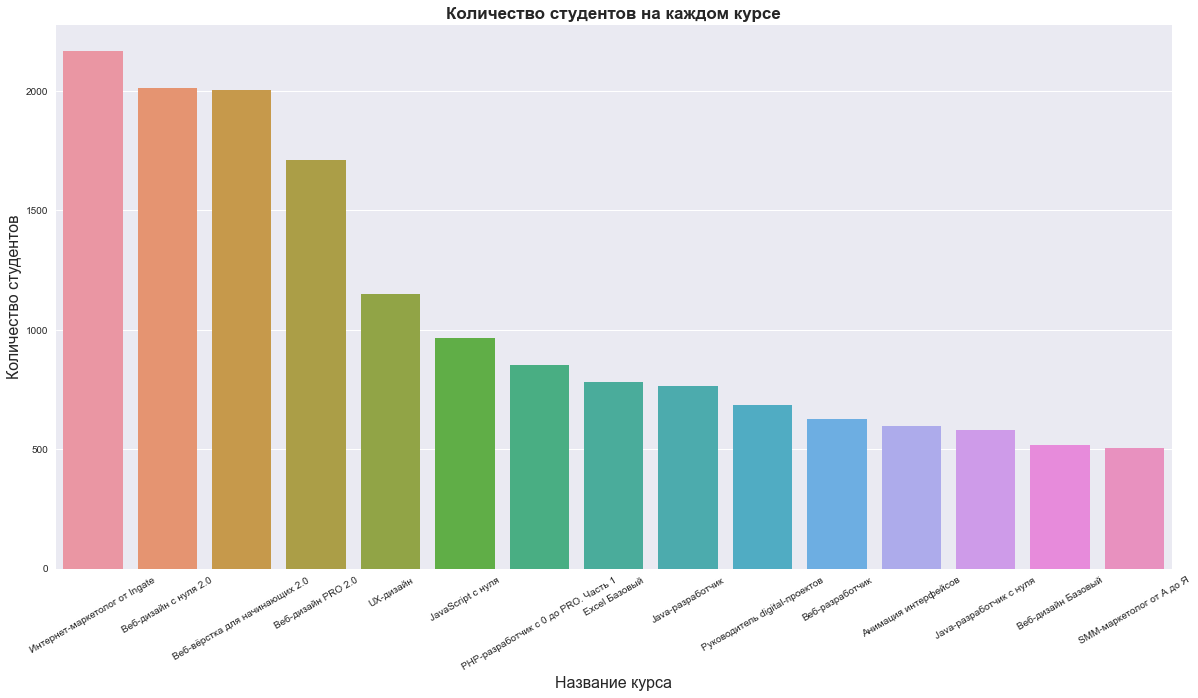

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(data=students_count, x='Название курса', y='Количество студентов', ax=ax, ci=None)

ax.set_title('Количество студентов на каждом курсе', fontsize=17, fontweight='bold')
ax.set_xlabel('Название курса', fontsize=16)
ax.set_ylabel('Количество студентов', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

plt.show()

### 1.3 - Горизонтальный bar-chart, отражающий количество студентов на каждом курсе:

* График должен иметь заголовок 
* Значения должны быть отсортированы
* Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда) 
* Прозрачность должна стоять на отметке 0.1 
* На график должна быть нанесена линия медианы. У медианы должен быть свой цвет
* Рамки у графика быть не должно 

In [24]:
# Посмотрим, какие есть сферы:

main_original['field'].unique()

array(['Design', 'Marketing', 'Development', 'Business'], dtype=object)

In [25]:
# Сгруппируем курсы по сферам:

fields = pd.DataFrame(main_original.groupby(by=['field', 'title'])['student_id'].nunique().reset_index())
fields.columns = ['Сфера курса','Название курса', 'Количество студентов']
fields.set_index('Сфера курса','Название курса')
fields.sort_values(by=['Сфера курса', 'Количество студентов'], ascending=False, inplace=True)
fields = fields.reset_index(drop=True)
fields

,Сфера курса,Название курса,Количество студентов
0,Marketing,Интернет-маркетолог от Ingate,2168
1,Marketing,SMM-маркетолог от А до Я,506
2,Development,Веб-вёрстка для начинающих 2.0,2004
3,Development,JavaScript с нуля,966
4,Development,PHP-разработчик с 0 до PRO. Часть 1,854
5,Development,Java-разработчик,763
6,Development,Веб-разработчик,628
7,Development,Java-разработчик c нуля,581
8,Design,Веб-дизайн с нуля 2.0,2014
9,Design,Веб-дизайн PRO 2.0,1711


In [26]:
# Создадим список цветов для каждой сферы по кол-ву курсов:

colors_list = ['cyan']*2 + ['dodgerblue']*6 + ['magenta']*5 + ['blueviolet']*2
colors_list

['cyan',
 'cyan',
 'dodgerblue',
 'dodgerblue',
 'dodgerblue',
 'dodgerblue',
 'dodgerblue',
 'dodgerblue',
 'magenta',
 'magenta',
 'magenta',
 'magenta',
 'magenta',
 'blueviolet',
 'blueviolet']

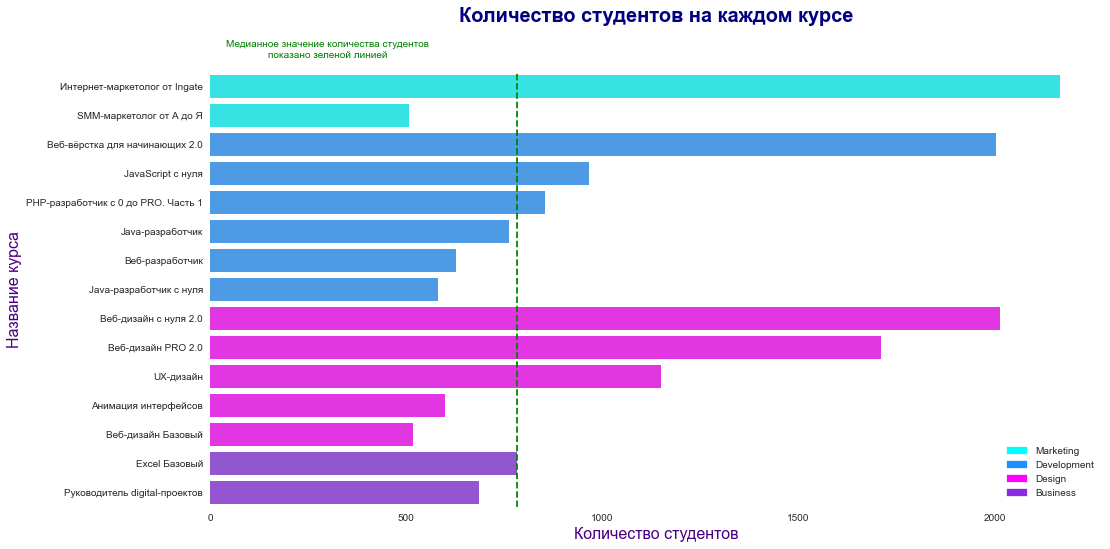

In [27]:
# Построим график:

fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(data=fields, y='Название курса', x='Количество студентов', ax=ax, alpha=0.9, palette=colors_list)

ax.set_title('Количество студентов на каждом курсе', fontsize=20, color='navy', fontweight='bold', pad=50)
ax.set_xlabel('Количество студентов', fontsize=16, color='indigo')
ax.set_ylabel('Название курса', fontsize=16, color='indigo')
ax.axvline(np.median(students_count['Количество студентов']), ls='--', color='g')  # медиана
ax.text(300.0, -1, "Медианное значение количества студентов\nпоказано зеленой линией",
        ha="center", color='g') # текст про медиану
plt.box(on=None)  # убирает рамку

cyan_patch = matplotlib.patches.Patch(color='cyan')
dodgerblue_patch = matplotlib.patches.Patch(color='dodgerblue')
magenta_patch = matplotlib.patches.Patch(color='magenta')
blueviolet_patch = matplotlib.patches.Patch(color='blueviolet')

plt.legend(handles=[cyan_patch,
                   dodgerblue_patch,
                   magenta_patch,
                   blueviolet_patch],
          labels=['Marketing',
                 'Development',
                 'Design',
                 'Business'])

plt.show()

### 1.4 - Аналитический вывод на основании рассчитанных значений:

* Образовательная платформа Skillbox проводит обучение студентов по 4-м направлениям - 
Design, Marketing, Development и Business.


* Каждая сфера включает в себя по несколько курсов, общее количество которых - 15.
* Больше всего курсов в сфере Development - 6 шт., затем идет Design - 5 шт. и по 2 шт. в остальных.


* Каждый курс включает в себя от 8 до 21 модулей.
* Меньше всего в курсах Веб-вёрстка для начинающих 2.0 и PHP-разработчик с 0 до PRO. Часть 1.	
* Больше всего в курсах Анимация интерфейсов, UX-дизайн и Веб-разработчик.


* В каждом модуле содержится в среднем от 2 до 13 уроков.
* Меньше всего уроков в курсах Анимация интерфейсов (3) и Веб-разработчик (2).
* Больше всего - в курсе Java-разработчик c нуля (13).


* При этом заметим, что в курсах Анимация интерфейсов и Веб-разработчик больше всего модулей, а уроков меньше всего.
* Поэтому можно сделать вывод, что большое кол-во модулей не означает, что эти курсы самые объемные. Возможно, в них, как в этих двух просто содержится меньше всего уроков.


* Больше всего студентов учится на курсах Интернет-маркетолог от Ingate (2168), Веб-дизайн с нуля 2.0(2014)	и Веб-вёрстка для начинающих 2.0(2004).
* Значит нужно уделять развитию и улучшению этих курсов приоритетное внимание. Следить за трендами, обновлять модули, вкладывать больше денег в рекламу и т.д. 


* Меньше всего студентов на курсе SMM-маркетолог от А до Я(506).
* Значит надо провести анализ, что можно улучшить в этом курсе (опросы студентов, реклама и т д) либо провести анализ рынка, и если это направление теряет свою актуальность, то, возможно, не вкладываться в него сильно и не тратить много денег на рекламу, а сосредоточиться на более актуальных и выгодных курсах.


* Медианное кол-во студентов на курсах - около 800 человек.
* Значит надо посмотреть, какие курсы проседают и сделать все возможное, чтобы медианное кол-во с каждым годом увеличивалось как за счет курсов-лидеров, так и за счет отстающих курсов.


* Проанализировав средний возраст учащихся, мы видим, что средний и медианный возраст близки  - 30-31 год.
* Это говорит о том, что большинство студентов - уже взрослые, состоявшиеся люди, которые знают, чего хотят и готовы за это платить. В этом возрасте у людей уже, преимущественно, есть работа и семьи. А значит, мало свободного времени. Им некогда ездить у университеты, поэтому они выбирают обучение онлайн в свободное время. Но самостоятельно не всегда получается все понять, а обратную связь от преподавателей иногда приходится ждать по несколько дней. Поэтому можно предложить им дополнительные услуги, экономящие время на обучение - например, репетиторство преподавателей. Наверняка, нашлись бы желающие, так как искать репетитора самому довольно проблематично. Особенно в обширных курсах, которые включают в себя по несколько областей знаний.

## 2. Расчет потенциальной нагрузки на преподавателей

### Расчет включает:

* прирост студентов на каждом курсе в каждом месяце за всю историю
* line-graph с приростом студентов в каждом месяце для каждого курса
* line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса
* рассчёт количества прогрессов по выполнению домашних работ в каждом месяце за всю историю
* line-graph по количеству прогрессов
* line-graph по количеству прогрессов для всех курсов
* аналитический вывод на основании рассчитанных значений

### 2.1 - Прирост студентов на каждом курсе в каждом месяце за всю историю:

* Каждый месяц в диапазоне от марта 2016 до июля 2019 включительно
* Считать дату начала прохождения курса студентом по дате начала первой домашней работы

In [28]:
# Для того, чтобы посчитать прирост студентов, надо посчитать кол-во сдач первой домашней работы
# Значит надо отобрать все первые домашние работы
# Для этого сначала выберем все записи с домашними работами:

main = main_original[main_original['is_homework'] == True].copy()

In [29]:
# Посмотрим на типы объектов нашего датафрейма:

main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54478 entries, 4 to 350667
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   student_id     54478 non-null  object
 1   course_id      54478 non-null  object
 2   progress_id    54478 non-null  object
 3   module_number  54478 non-null  int64 
 4   lesson_number  54478 non-null  int64 
 5   status         54478 non-null  object
 6   start_date     54478 non-null  object
 7   finish_date    44925 non-null  object
 8   title          54478 non-null  object
 9   field          54478 non-null  object
 10  module_title   54478 non-null  object
 11  lesson_title   54478 non-null  object
 12  lesson_token   54478 non-null  object
 13  is_video       54478 non-null  bool  
 14  is_homework    54478 non-null  bool  
dtypes: bool(2), int64(2), object(11)
memory usage: 5.9+ MB


In [30]:
# Преобразуем поля 'start_date' и 'finish_date' в формат даты:

main['start_date'] =  pd.to_datetime(main.start_date)
main['finish_date'] =  pd.to_datetime(main.finish_date)

# Для удобства преобразуем формат даты - оставим только месяц и год:

main['YearMonth'] = main['start_date'].values.astype('datetime64[M]')
main['YearMonth'] = main['YearMonth'].dt.to_period('M')

main['YearMonth'] = main['finish_date'].values.astype('datetime64[M]')
main['YearMonth'] = main['YearMonth'].dt.to_period('M')

# Проверим:

main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54478 entries, 4 to 350667
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   student_id     54478 non-null  object             
 1   course_id      54478 non-null  object             
 2   progress_id    54478 non-null  object             
 3   module_number  54478 non-null  int64              
 4   lesson_number  54478 non-null  int64              
 5   status         54478 non-null  object             
 6   start_date     54478 non-null  datetime64[ns, UTC]
 7   finish_date    44925 non-null  datetime64[ns, UTC]
 8   title          54478 non-null  object             
 9   field          54478 non-null  object             
 10  module_title   54478 non-null  object             
 11  lesson_title   54478 non-null  object             
 12  lesson_token   54478 non-null  object             
 13  is_video       54478 non-null  bool          

In [31]:
# Теперь надо посмотреть на зависимость понятия "первая домашняя работа курса" от номера домашней работы
# После этого отфильтровать только те записи, которые относятся к первым домашним работам

# Первая домашняя работа на курсе:

n_of_lst_hw = main.groupby(['title'])['module_number'].agg(min).reset_index()
#n_of_lst_hw = main.groupby(['title']).agg({'module_number': [min]}).reset_index() - можно так

n_of_lst_hw.columns = ['title', 'module_number']
n_of_lst_hw

,title,module_number
0,Excel Базовый,1
1,Java-разработчик,1
2,Java-разработчик c нуля,1
3,JavaScript с нуля,1
4,PHP-разработчик с 0 до PRO. Часть 1,1
5,SMM-маркетолог от А до Я,1
6,UX-дизайн,1
7,Анимация интерфейсов,1
8,Веб-вёрстка для начинающих 2.0,1
9,Веб-дизайн PRO 2.0,1


In [32]:
# Сортируем датафрейм с помощью объединения с датафреймом только с номерами первых домашних работ на курсе:

main_sorted = main.merge(n_of_lst_hw, left_on=['title', 'module_number'], right_on=['title', 'module_number'])
main_sorted = main_sorted.groupby(['title', 'YearMonth'])['YearMonth'].count().unstack(fill_value=0).\
stack().to_frame().reset_index()

main_sorted.columns = ['title', 'year_and_month', 'growth']
main_sorted.head(15)

,title,year_and_month,growth
0,Excel Базовый,2016-03,0
1,Excel Базовый,2016-11,0
2,Excel Базовый,2016-12,0
3,Excel Базовый,2017-03,0
4,Excel Базовый,2017-04,0
5,Excel Базовый,2017-05,0
6,Excel Базовый,2017-06,0
7,Excel Базовый,2017-07,0
8,Excel Базовый,2018-01,0
9,Excel Базовый,2018-02,6


### 2.2 - line-graph с приростом студентов в каждом месяце для каждого курса:

* 15 графиков
* Графики должны иметь заголовки, оси должны быть подписаны
* Ticks нужно развернуть так, чтобы они были читаемы

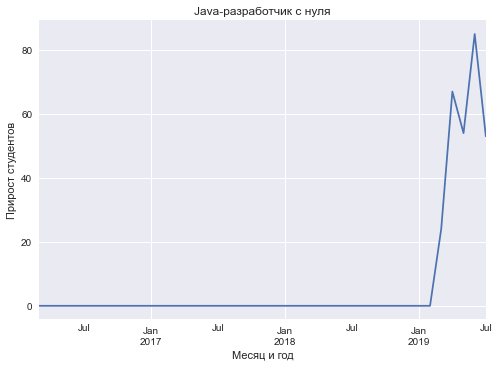

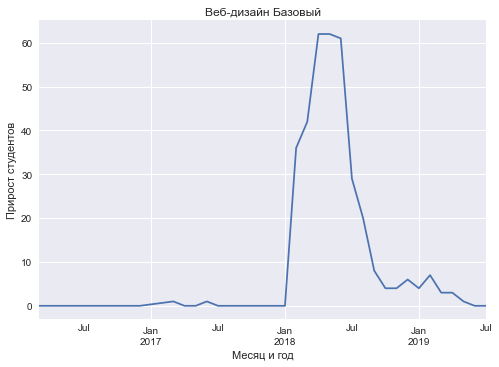

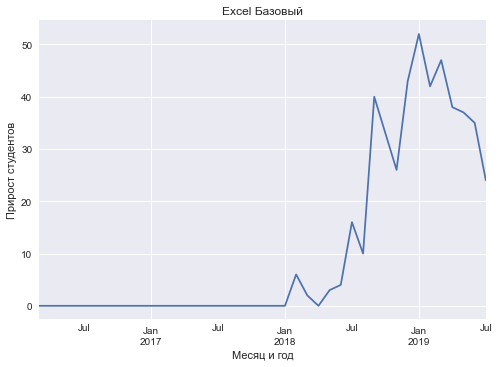

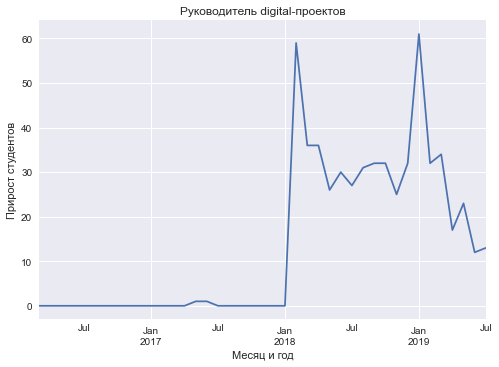

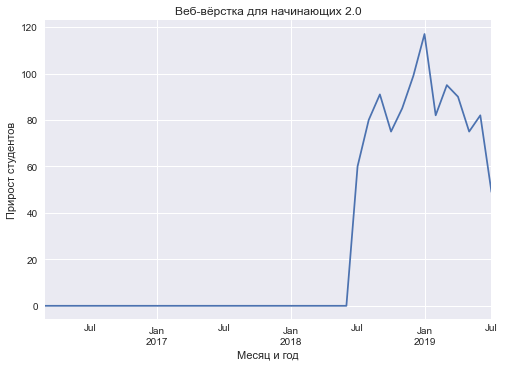

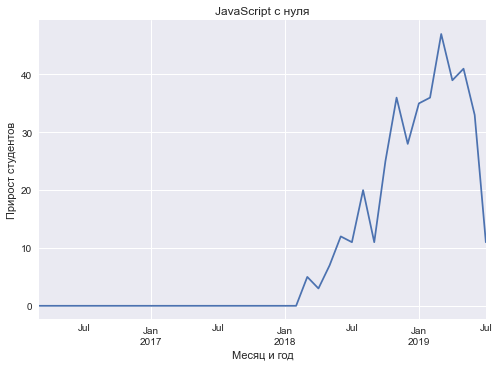

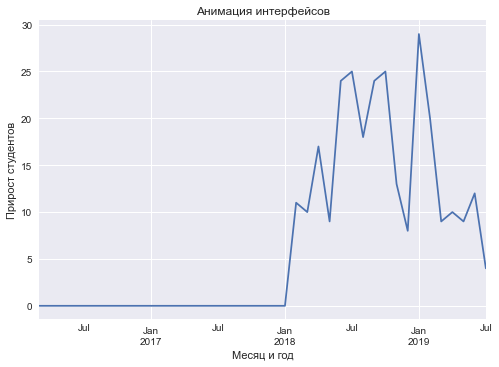

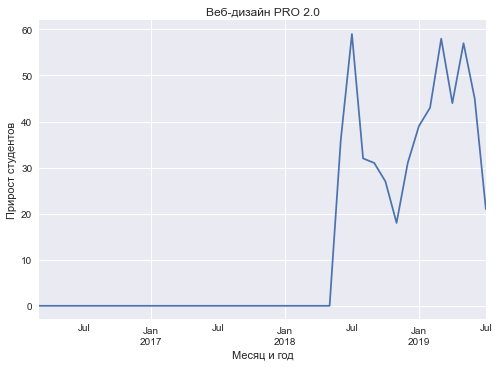

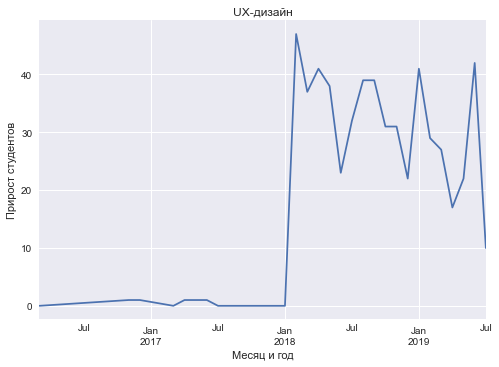

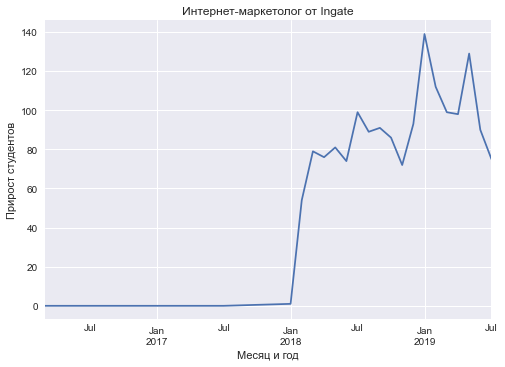

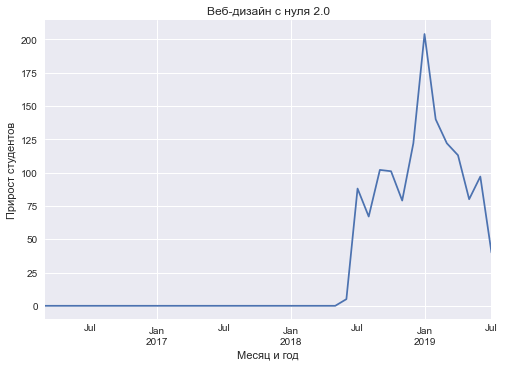

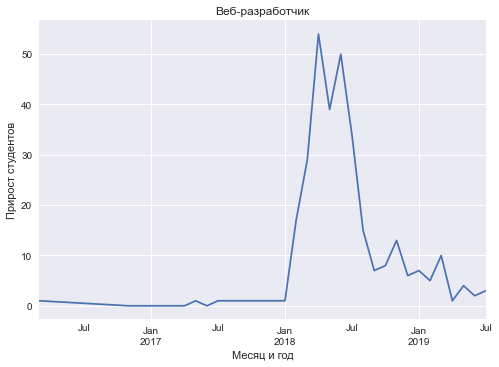

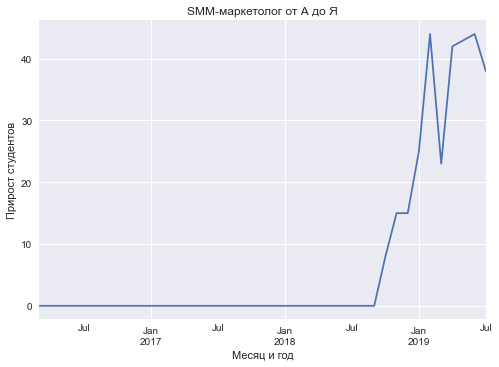

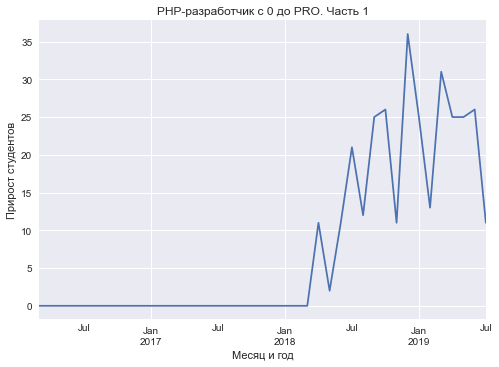

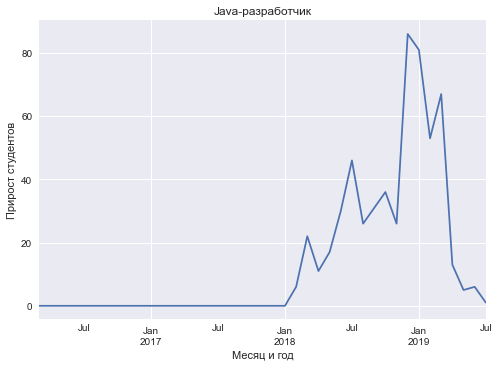

In [33]:
for course in courses['title']:
    subdf = main_sorted[main_sorted['title'] == course][['year_and_month', 'growth']].set_index('year_and_month')
    subdf.plot.line()
    
    plt.title(course)
    plt.xlabel('Месяц и год')
    plt.ylabel('Прирост студентов')
    plt.legend().set_visible(False)  # убираем легенду
    
    plt.show()

### 2.3 - line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса:

* 15 линий на графике
* Ticks нужно развернуть так, чтобы они были читаемы
* График должен иметь заголовок
* Ось, отражающая прирост, должна быть подписана
* Линия для каждого курса должна иметь свой цвет (нужна легенда)
* Рамок у графика быть не должно

In [34]:
main_sorted.head(3)

,title,year_and_month,growth
0,Excel Базовый,2016-03,0
1,Excel Базовый,2016-11,0
2,Excel Базовый,2016-12,0


In [35]:
# Перевернем таблицу:

pivoted_main_sorted = pd.pivot_table(main_sorted, 
                                    index=main_sorted['year_and_month'],
                                    values='growth',
                                    columns=main_sorted['title'],
                                    fill_value=0)
pivoted_main_sorted.head(3)

title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
year_and_month,,,,,,,,,,,,,,,
2016-03,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2016-11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2016-12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


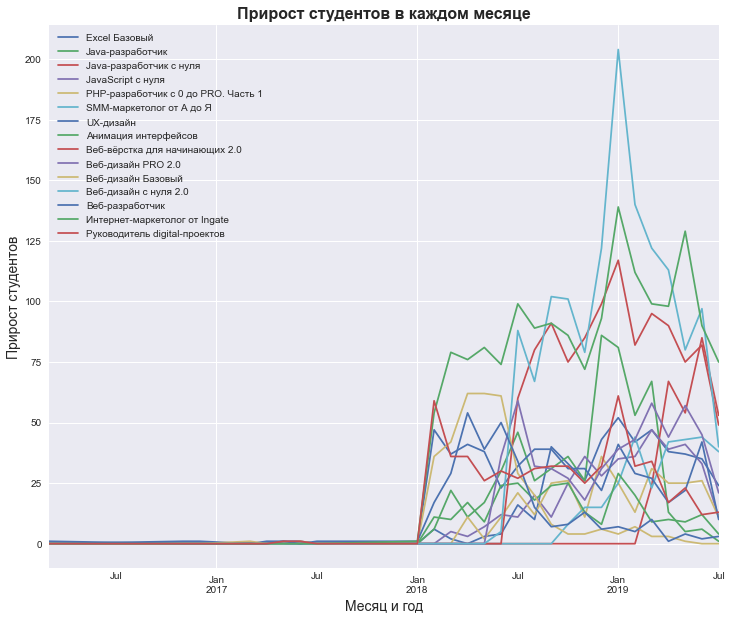

In [36]:
ax = pivoted_main_sorted.plot(figsize=(12,10))
    
ax.set_title('Прирост студентов в каждом месяце', fontweight='bold', fontsize=16)
ax.set_xlabel('Месяц и год', fontsize=14)
ax.set_ylabel('Прирост студентов', fontsize=14)
ax.legend()

plt.show()

### 2.4 - Количество прогрессов по выполнению домашних работ в каждом месяце за всю историю:

* Каждый месяц в диапазоне от марта 2016 до июля 2019 включительно для каждого курса
* Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой 
(такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [37]:
main = main_original[main_original['is_homework']==True][['title','progress_id', 'lesson_token', 'start_date','finish_date']].copy()
main['start_date'] = pd.to_datetime(main.start_date, utc = True)
main['finish_date'] = pd.to_datetime(main.finish_date, utc = True)

# делаем так, чтобы в start_date стоял первый день месяца, в котором начата дз,
# а в finish_date последний день месяца начала, если работа еще не закончена, и то, что есть, если закончена:
from pandas.tseries.offsets import MonthEnd, MonthBegin, Day
from math import ceil

# приводим все значения к первой дате месяца:
main['start_date'] = main['start_date'].apply(lambda x: pd.Timestamp(x) + Day() - MonthBegin())

main['finish_date'] = main[['start_date','finish_date']].apply(lambda x: pd.Timestamp(x['start_date']) - Day() + MonthEnd() if pd.isna(x['finish_date']) else x['finish_date'],axis=1)

main['start_date'] = pd.to_datetime(main.start_date, utc = True)
main['finish_date'] = pd.to_datetime(main.finish_date, utc = True)

# делаем список месяцев, в которых выполнялось каждое дз:
main['time']=main[['start_date','finish_date']].apply(lambda x: list(pd.date_range(start=x['start_date'], periods=ceil((x['finish_date'] - x['start_date'])/np.timedelta64(1, 'M')), freq='M')),axis=1)

final_df = main.explode('time')

final_df['time']= final_df['time'].dt.to_period('M')

workload = final_df.groupby(['title','time'])['title'].count().unstack(fill_value=0).stack().to_frame().reset_index()

workload.columns = ['title','year_and_month', 'workload']
workload.head(30)

,title,year_and_month,workload
0,Excel Базовый,2016-03,0
1,Excel Базовый,2016-11,0
2,Excel Базовый,2016-12,0
3,Excel Базовый,2017-01,0
4,Excel Базовый,2017-02,0
5,Excel Базовый,2017-03,0
6,Excel Базовый,2017-04,0
7,Excel Базовый,2017-05,0
8,Excel Базовый,2017-06,0
9,Excel Базовый,2017-07,0


In [38]:
# Выберем все записи с домашними работами и оставим только нужные столбцы:
main = main_original[main_original['is_homework']==True][['title','progress_id', 'lesson_token', 'start_date','finish_date']].copy()

# Преобразуем поля 'start_date' и 'finish_date' в формат даты:
main['start_date'] = pd.to_datetime(main.start_date, utc = True)
main['finish_date'] = pd.to_datetime(main.finish_date, utc = True)

# Сделаем так, чтобы в start_date стоял первый день месяца, в котором начата ДЗ,
# а в finish_date последний день месяца начала, если работа еще не закончена, и то, что есть, если закончена:
from pandas.tseries.offsets import MonthEnd, MonthBegin

main['start_date'] = main['start_date'].apply(lambda x: pd.Timestamp(x) + Day() - MonthBegin())
main['finish_date'] = main[['start_date','finish_date']]\
    .apply(lambda x: pd.Timestamp(x['start_date']) - Day() + MonthEnd() if pd.isna(x['finish_date']) else x['finish_date'],axis=1)

main['start_date'] = pd.to_datetime(main.start_date, utc = True)
main['finish_date'] = pd.to_datetime(main.finish_date, utc = True)

# Сделаем список месяцев, в которых выполнялось каждое ДЗ:
main['time']=main[['start_date','finish_date']]\
    .apply(lambda x: list(pd.date_range(start=x['start_date'], 
                                        periods=ceil((x['finish_date'] - x['start_date'])/np.timedelta64(1, 'M')), 
                                        freq='M')),axis=1) # m - частота окончания месяца

final_df = main.explode('time')

# Для удобства преобразуем формат даты - оставим только месяц и год:
final_df['time']= final_df['time'].dt.to_period('M')
final_df.head(3)

,title,progress_id,lesson_token,start_date,finish_date,time
4,Веб-дизайн PRO 2.0,a387ab916f402cb3fbfffd29f68fd0ce,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,2018-06-01 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,2018-06
7,Веб-дизайн PRO 2.0,a387ab916f402cb3fbfffd29f68fd0ce,90c5f618-e9f3-4af8-96ab-f41b312bfa77,2018-06-01 08:31:00.338883+00:00,2018-06-30 08:31:00.338883+00:00,2018-06
12,Интернет-маркетолог от Ingate,a97393fe164b448e7231c07d48c82f9e,bae729ef-e399-4ed8-a62b-c8195ed754aa,2018-03-01 14:14:44.814222+00:00,2018-03-31 14:14:44.814222+00:00,2018-03


In [39]:
# Сгруппируем и перевернем таблицу:
workload = final_df.groupby(['title','time'])['title'].count().unstack(fill_value=0).stack().to_frame().reset_index()

workload.columns = ['title','year_and_month', 'workload']
workload.head(30)

,title,year_and_month,workload
0,Excel Базовый,2016-03,0
1,Excel Базовый,2016-11,0
2,Excel Базовый,2016-12,0
3,Excel Базовый,2017-01,0
4,Excel Базовый,2017-02,0
5,Excel Базовый,2017-03,0
6,Excel Базовый,2017-04,0
7,Excel Базовый,2017-05,0
8,Excel Базовый,2017-06,0
9,Excel Базовый,2017-07,0


### 2.5 - line-graph по четвертому пункту:

* 15 графиков
* Графики должны иметь заголовки, оси должны быть подписаны
* Ticks нужно развернуть так, чтобы они были читаемы

In [40]:
workload.head(3)

,title,year_and_month,workload
0,Excel Базовый,2016-03,0
1,Excel Базовый,2016-11,0
2,Excel Базовый,2016-12,0


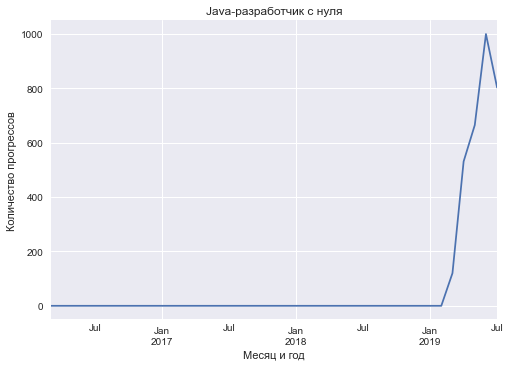

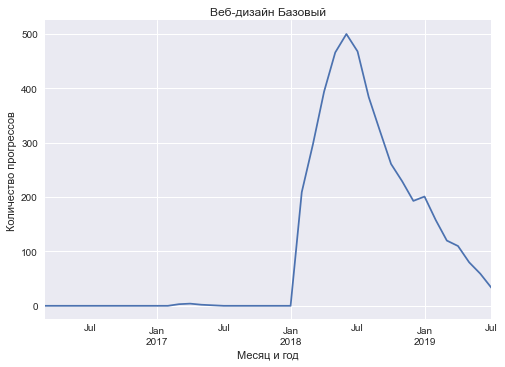

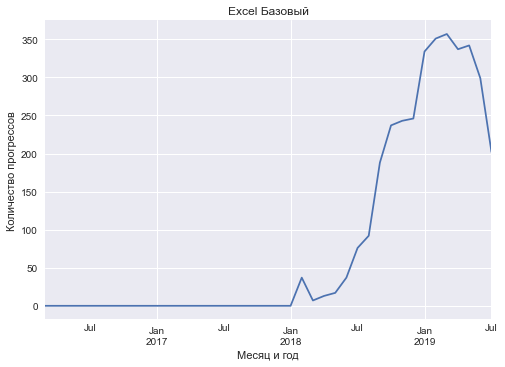

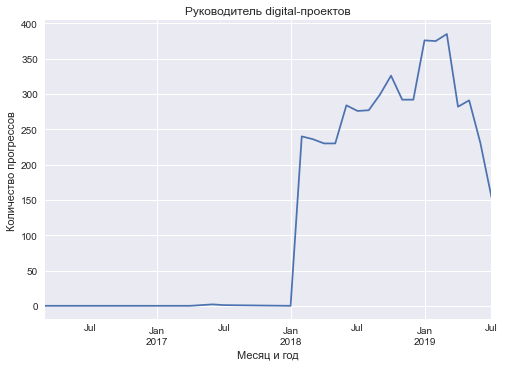

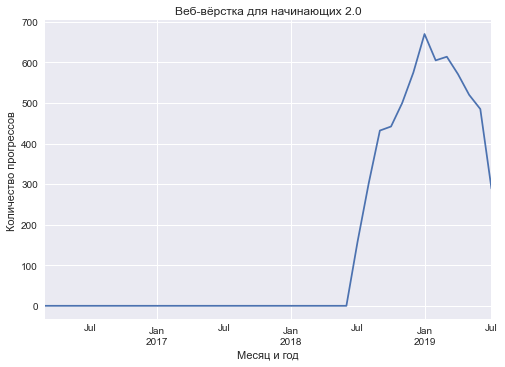

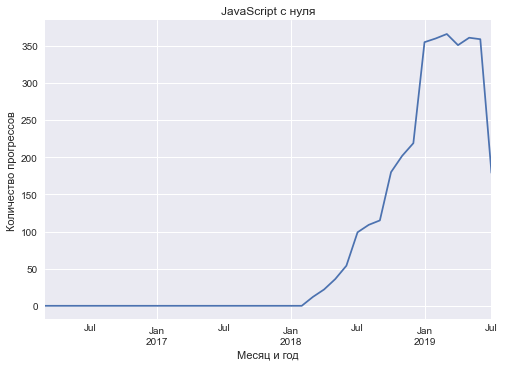

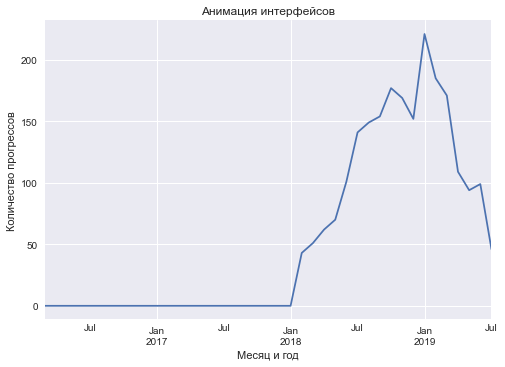

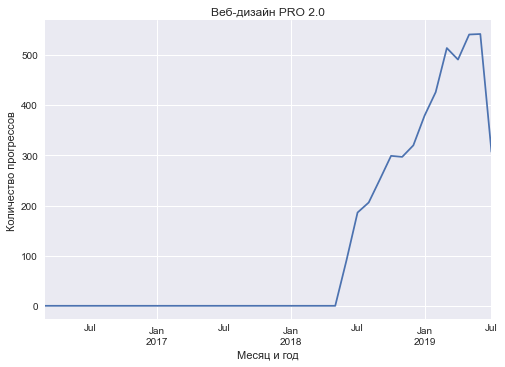

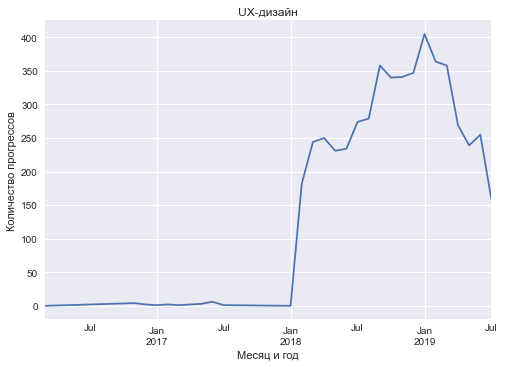

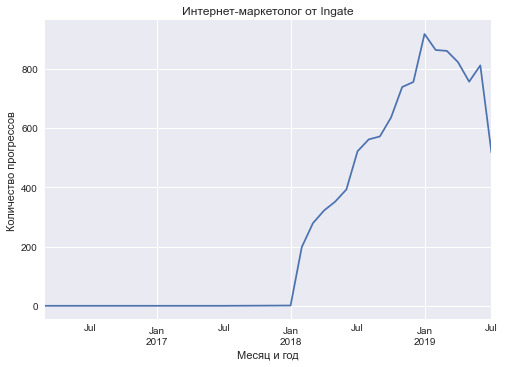

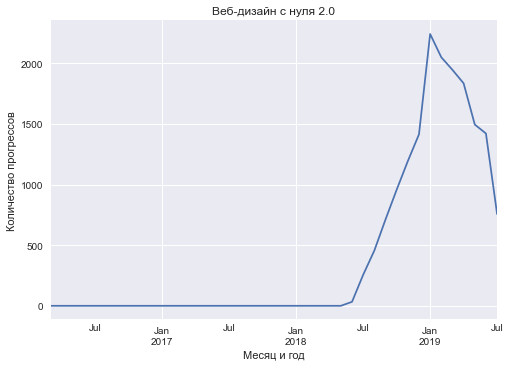

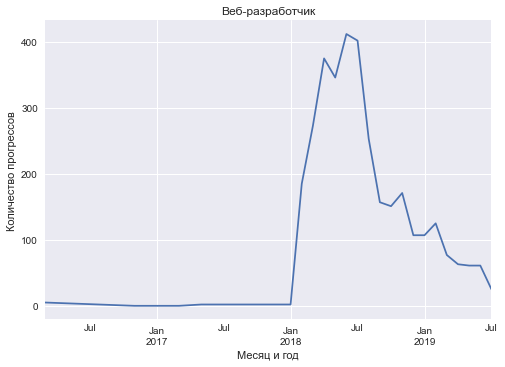

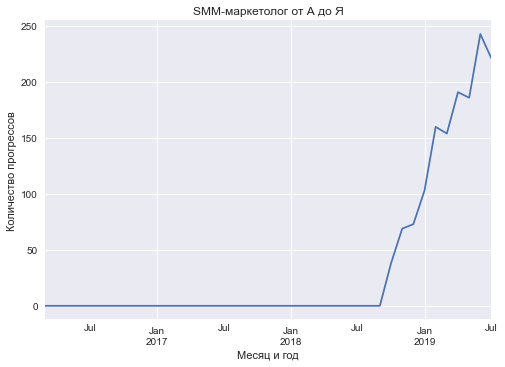

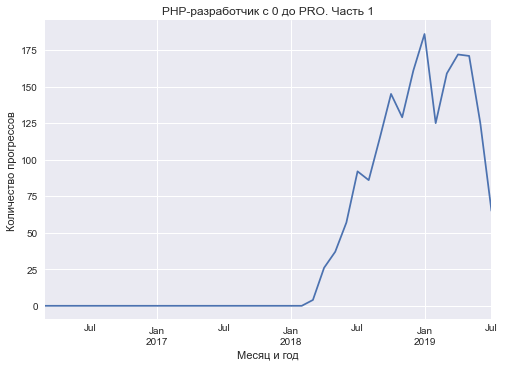

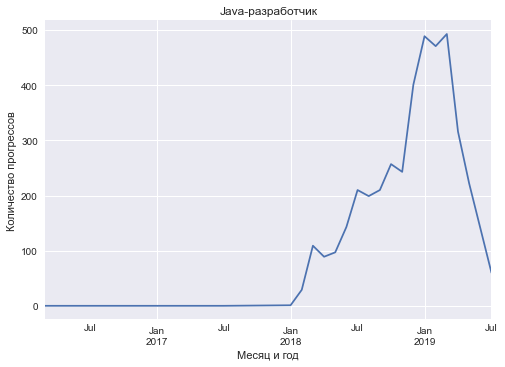

In [41]:
for course in courses['title']:
    subdf =workload[workload['title'] == course][['year_and_month', 'workload']].set_index('year_and_month')
    subdf.plot.line()
    
    plt.title(course)
    plt.xlabel('Месяц и год')
    plt.ylabel('Количество прогрессов')
    plt.legend().set_visible(False)  # убираем легенду
    
    plt.show()

### 2.6 - Один line-graph для всех курсов по четвертому пункту:

* 15 линий на графике
* Ticks нужно развернуть так, чтобы они были читаемы
* График должен иметь заголовок
* Ось, отражающая количество прогрессов, должна быть подписана
* Линия для каждого курса должна иметь свой цвет (нужна легенда)
* Рамок у графика быть не должно

In [42]:
workload.head(3)

,title,year_and_month,workload
0,Excel Базовый,2016-03,0
1,Excel Базовый,2016-11,0
2,Excel Базовый,2016-12,0


In [43]:
# Перевернем таблицу:

pivoted_workload = pd.pivot_table(workload, 
                                    index=workload['year_and_month'],
                                    values='workload',
                                    columns=workload['title'],
                                    fill_value=0)
pivoted_workload.head(3)

title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
year_and_month,,,,,,,,,,,,,,,
2016-03,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
2016-11,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
2016-12,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0


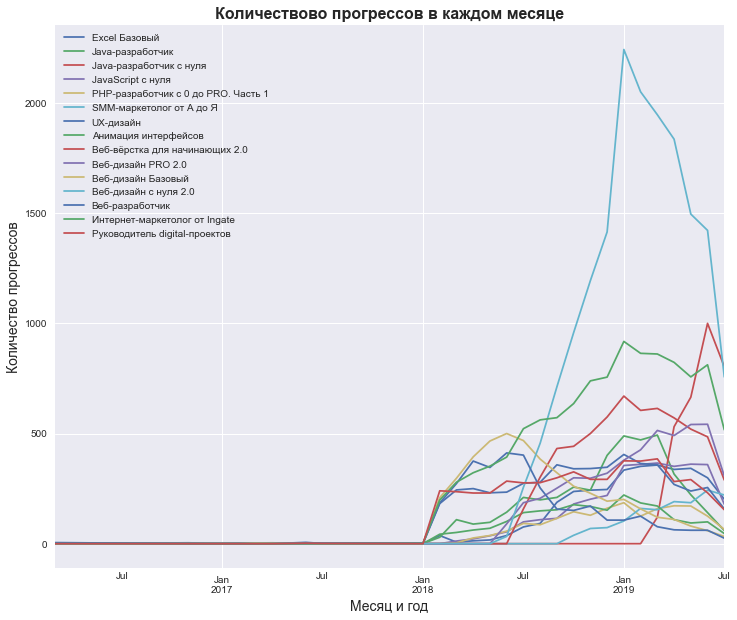

In [44]:
ax = pivoted_workload.plot(figsize=(12,10))
    
ax.set_title('Количествово прогрессов в каждом месяце', fontweight='bold', fontsize=16)
ax.set_xlabel('Месяц и год', fontsize=14)
ax.set_ylabel('Количество прогрессов', fontsize=14)
ax.legend()

plt.show()

### 2.7 - Аналитический вывод на основании рассчитанных значений:

* Выполнив расчеты и построив графики, можно заметить, что по приросту стедентов выделяются следующие лидеры: «Веб-дизайн с нуля 2.0» и «Веб-вёрстка для начинающих 2.0», «Интернет-маркетолог от Ignate», «Java-разработчик с нуля».
* Аналогичные показатели наблюдаются и по прогрессам.
* Также можно заметить некоторую сезонность - основные приросты наблюдаются в зимнее время, начиная с ноября-декабря, а летом заметно падают.
* Тоже самое можно сказать и про прогрессы - основной пик совпадает с периодом набора новых студентов в начале года, снижение прогрессов наблюдается в летние периоды.

## 3. Выявление проблемных модулей

### Расчёт включает:

* расчёт минимального, максимального, среднего, медианного времени прохождения каждого модуля
* line-graph с медианным временем прохождения каждого модуля для каждого курса
* расчёт медианного времени выполнения домашней работы по месяцам для выялвелния сезонности
* line-graph для каждого курса с медианным временем выполнения домашней работы по месяцам
* аналитический вывод на основании рассчитанных значений

### 3.1 - Расчет минимального, максимального, среднего, медианного времени прохождения каждого модуля:

* (разность между временем начала и окончания выполнения домашней работы для каждого курса)
* Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [45]:
# 1-й вариант:

# Выберем все записи с выполненными домашними работами и оставим только нужные столбцы:
temp = main_original[(main_original['is_homework'] == True) & (main_original['status'] == 'done')]\
[['title', 'module_number', 'module_title', 'student_id', 'start_date', 'finish_date']]

# Преобразуем столбцы 'start_date' и 'finish_date' в тип datetime:
temp['start_date'] = pd.to_datetime(temp.start_date, utc = True)
temp['finish_date'] = pd.to_datetime(temp.finish_date, utc = True)

# Посчитаем разность между временем начала и окончания выполнения домашней работы для каждого курса:
temp = pd.DataFrame(temp.groupby(by=['title', 'module_number', 'module_title', 'student_id'])['finish_date'].agg(max) - \
                        temp.groupby(by=['title', 'module_number', 'module_title', 'student_id'])['start_date'].agg(min))
temp.columns = ['duration']
temp.head(3)

duration
title         module_number module_title              student_id                                             
Excel Базовый 1             Основной функционал Excel 001b192f899a84496be98b41906246fc 1 days 10:35:53.150503
                                                      006f0189ec657741ee4d53474c7a258d 1 days 06:27:09.731919
                                                      0074621b6955733338ab0feb2a9a2100 2 days 15:48:24.112010

In [46]:
# Рассчитаем минимальное, максимальное, среднее и медианное время прохождения каждого модуля:

stat = pd.DataFrame(temp['duration'].astype('int64').groupby(['title', 'module_number', 'module_title']).\
                    min().astype('datetime64[ns]')-pd.to_datetime(0)).reset_index().rename(columns={'duration': 'min_time'})
        
stat['max_time'] = (temp['duration'].astype('int64').groupby(['title', 'module_number','module_title']).\
                                                   max().astype('datetime64[ns]')-pd.to_datetime(0)).values
stat['mean_time'] = (temp['duration'].astype('int64').groupby(['title', 'module_number', 'module_title']).\
                                                    mean().astype('datetime64[ns]')-pd.to_datetime(0)).values
stat['median_time'] = (temp['duration'].astype('int64').groupby(['title', 'module_number', 'module_title']).\
                                                 median().astype('datetime64[ns]')-pd.to_datetime(0)).values
stat.head(3)

,title,module_number,module_title,min_time,max_time,mean_time,median_time
0,Excel Базовый,1,Основной функционал Excel,-1 days +23:59:59.999725,183 days 17:57:52.247793,5 days 23:47:54.195382095,2 days 07:24:50.049678
1,Excel Базовый,2,Основной функционал Excel (продолжение),-1 days +23:59:59.999707,184 days 06:27:48.841839,4 days 07:20:42.029634647,1 days 20:24:06.134843500
2,Excel Базовый,3,Формулы и функции Excel. Введение,-1 days +23:59:59.999765,89 days 03:11:50.758958,3 days 09:55:13.662154715,1 days 11:54:27.957196


### 3.2 - line-graph на основании первого пункта с медианным временем прохождения каждого модуля для каждого курса:

* 15 графиков
* Графики должны иметь заголовки

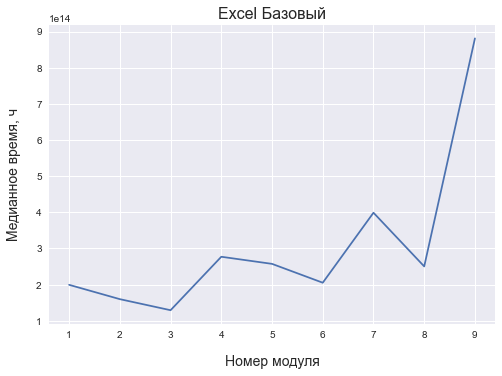

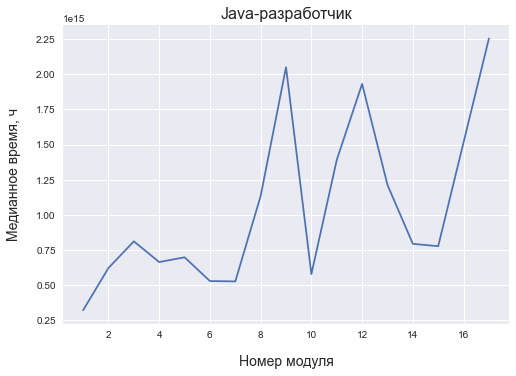

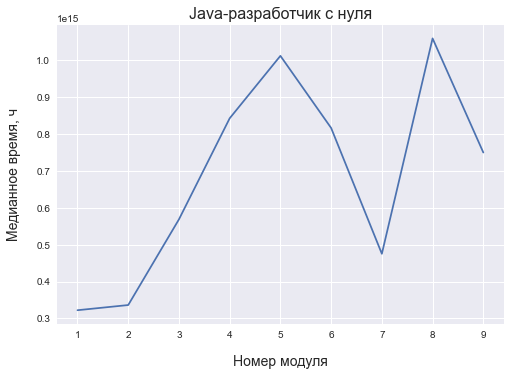

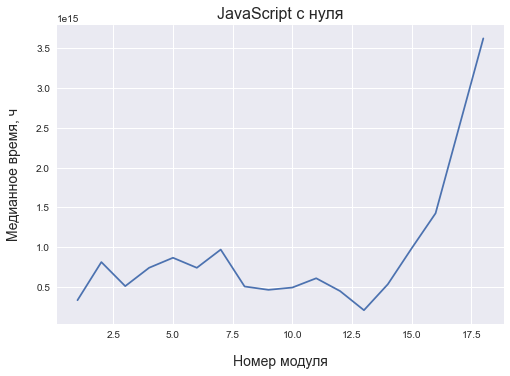

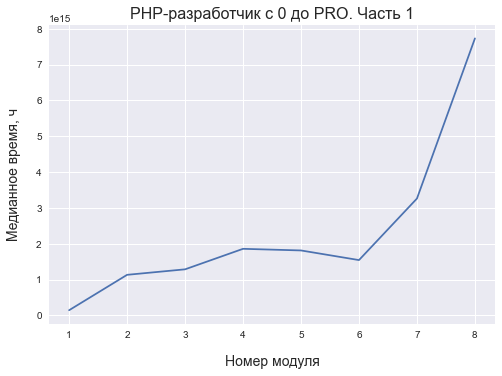

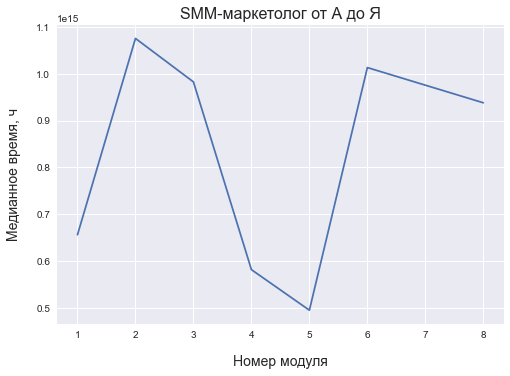

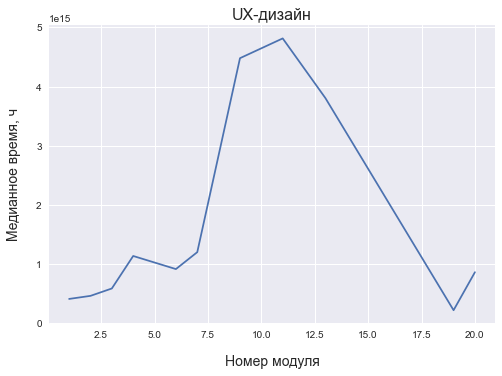

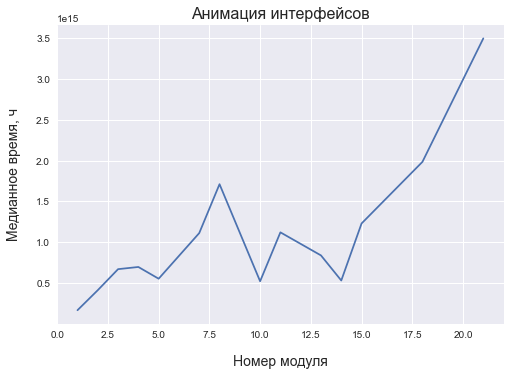

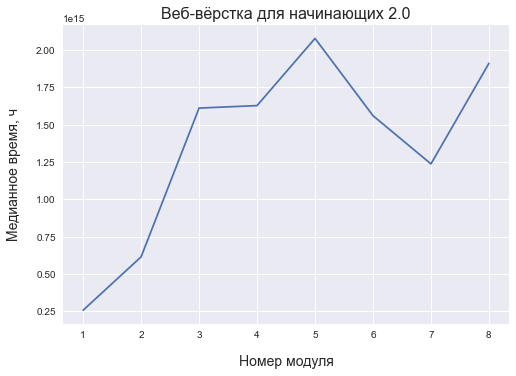

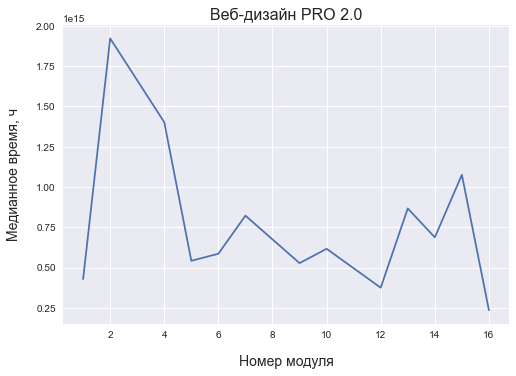

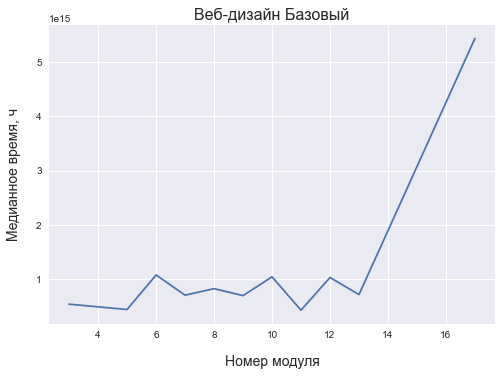

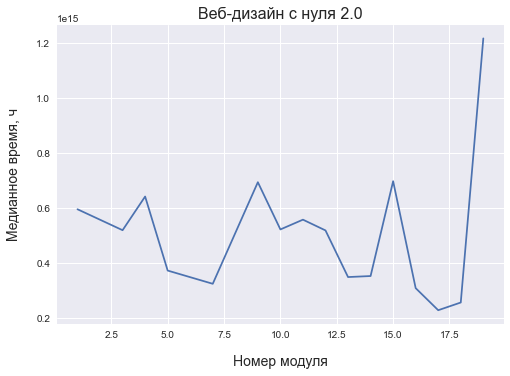

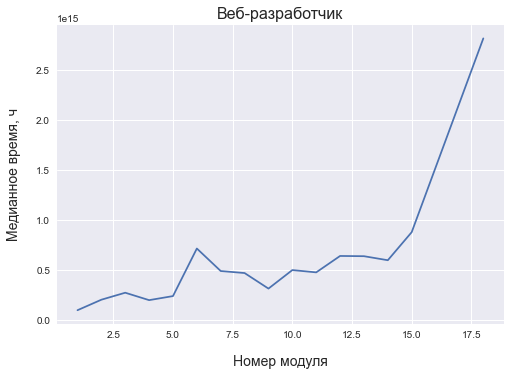

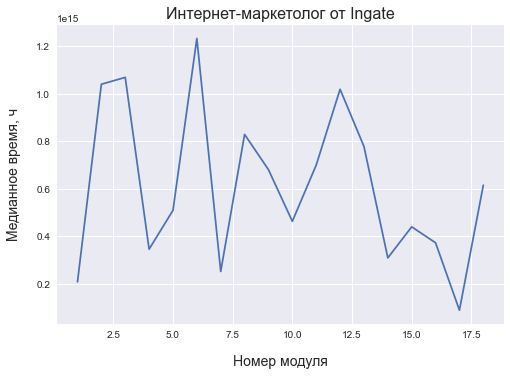

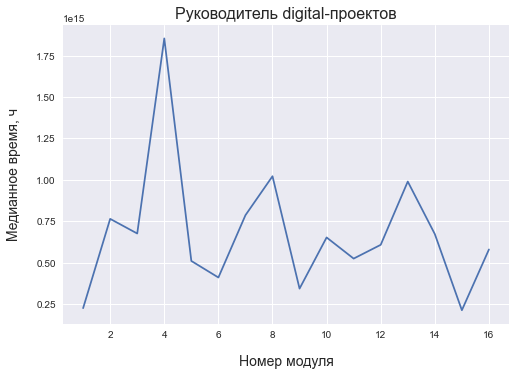

In [47]:
for name, data in stat.groupby('title'):
    fig, ax = plt.subplots()
    ax.plot(data['module_number'], data['median_time'])
    plt.title(name, fontsize=16)
    plt.xlabel('Номер модуля', fontsize=14, labelpad=15)
    plt.ylabel('Медианное время, ч', fontsize=14, labelpad=15)
    
plt.show()

### 3.3 - Медианное время выполнения домашней работы по месяцам (для выявления сезонности):

* 12 месяцев, январь-декабрь для каждого курса.

In [48]:
# Преобразуем столбцы 'start_date' и 'finish_date' в тип datetime:
main_original['start_date'] = pd.to_datetime(main_original.start_date, utc = True)
main_original['finish_date'] = pd.to_datetime(main_original.finish_date, utc = True)

# Оставим работы, начавшиеся и закончившиеся в одном месяце:
med = main_original[(main_original['start_date'].dt.year == main_original['finish_date'].dt.year) &
                  (main_original['start_date'].dt.month == main_original['finish_date'].dt.month) &
                  (main_original['is_homework'] == True) & (main_original['status'] == 'done')
                 ][['title', 'start_date', 'finish_date']]

med['month'] = main_original['start_date'].dt.month
med['duration'] = med['finish_date'].astype('int64') - med['start_date'].astype('int64')

med = pd.DataFrame(med.groupby(['title', 'month'])['duration'].median().astype('datetime64[ns]')-pd.to_datetime(0)).reset_index()
med.columns = ['Course_title', 'Month', 'Median_duration']
med.head(3)

,Course_title,Month,Median_duration
0,Excel Базовый,1,1 days 23:43:59.408854
1,Excel Базовый,2,2 days 00:07:21.128452
2,Excel Базовый,3,2 days 11:32:03.679418500


### 3.4 -  line-graph на основании третьего пункта, на который нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам:

* 15 линий на графике
* График должен иметь заголовок
* Ось, отражающая время прохождения, должна быть подписана
* Линия для каждого курса должна иметь свой цвет (нужна легенда)
* Рамок у графика быть не должно

In [49]:
# Переведем в часы столбец 'Median_duration':

med['Hours'] = med['Median_duration'].values / np.timedelta64(1, 'h')
med.head(3)

,Course_title,Month,Median_duration,Hours
0,Excel Базовый,1,1 days 23:43:59.408854,47.733169
1,Excel Базовый,2,2 days 00:07:21.128452,48.122536
2,Excel Базовый,3,2 days 11:32:03.679418500,59.534355


In [50]:
# Перевернем таблицу:

pivoted_med = pd.pivot_table(med,
                             index=med['Month'],
                             values='Hours',
                             columns=med['Course_title'],
                             fill_value=0)
pivoted_med.head(3)

Course_title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
Month,,,,,,,,,,,,,,,
1,47.733169,88.139672,0.000000,102.047001,72.675978,128.815039,129.398528,100.278807,111.719267,113.200280,110.325668,98.382946,96.230890,94.133764,92.198818
2,48.122536,68.911021,0.000000,108.126635,44.126835,114.240515,20.796788,24.999114,101.538896,108.863531,20.665668,100.433667,20.755713,42.824968,20.776609
3,59.534355,100.393699,89.981201,91.156365,42.954090,184.264867,121.527287,106.526559,66.223106,95.385726,232.338419,75.037533,54.692222,87.675399,86.999242


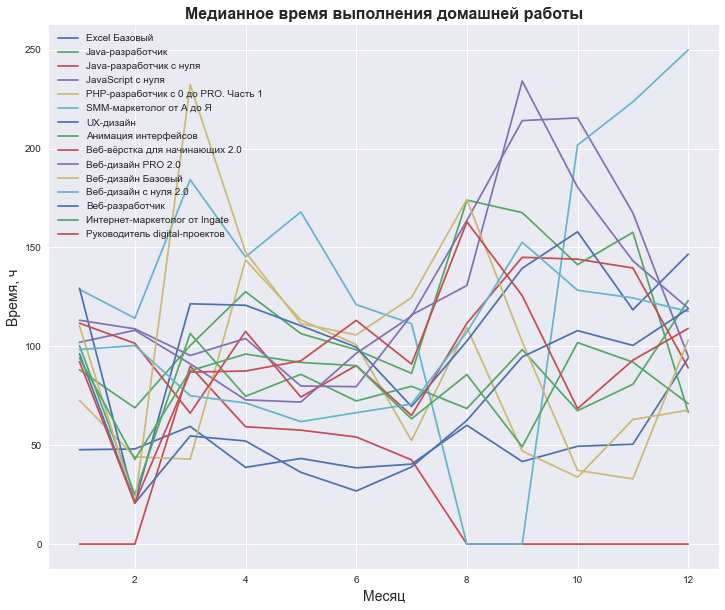

In [51]:
# Построим график:

ax = pivoted_med.plot(figsize=(12,10))
    
ax.set_title('Медианное время выполнения домашней работы', fontweight='bold', fontsize=16)
ax.set_xlabel('Месяц', fontsize=14)
ax.set_ylabel('Время, ч', fontsize=14)
ax.legend()

plt.show()

### 3.5 - Аналитический вывод на основании рассчитанных значений:

* Вычисленные показатели медианного времени прохождения модулей показывают, что студенты тратят больше всего времени на курсах «PHP-разработчик с 0 до PRO. Часть 1», «Web-дизайн Базовый», меньше всего - «Excel Базовый», «Java-разработчик с нуля», «SMM-маркетолог от А до Я». Возможно, это связано со сложностью курсов.
* Можно заметить тенденции основного количества курсов к увеличению медианного времени выполнения домашних работ по месяцам в зимние месяцы (начаиная с ноября по февраль), что связано с приходом новых студентов. С марта заметно снижение вплоть до июля. Начиная с июля по сентябрь заметно увеличение показателя медианного времени. В октябре снова наблюдается снижение.

## 4. Расчет конверсии

### Расчёт включает:

* расчёт конверсии перехода студентов из одного модуля в другой на каждом курсе
* bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе
* горизонтальный bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе
* аналитический вывод на основании рассчитанных значений

### 4.1 - Конверсия перехода студентов из одного модуля в другой на каждом курсе:

* Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

In [73]:
# Создадим промежуточный датафрейм со всеми записями с домашними работами:
conv_df = main_original[(main_original['is_homework'] == True)].sort_values(['title','module_number'])

# Подготовим датафрейм-ответ:
conversion_df = main_original[(main_original['is_homework'] == True)][['title','module_number','module_title']].\
sort_values(['title','module_number']).drop_duplicates()

# Определим наименования первой и последней домашних работ:
conversion_df['first_hw'] = conv_df.groupby(['title','module_number'])['lesson_title'].min().values
conversion_df['last_hw'] = conv_df.groupby(['title','module_number'])['lesson_title'].max().values

In [74]:
# Определим количество студентов, приступивших к выполнению домашнего задания в модуле:
started_hw = []  

# и сдавших домашнее задание в модуле:
finished_hw = [] 

for index, row in conversion_df.iterrows():
    # так как конверсия не рассчитывается для первого модуля в курсе, 
    # примем для него количество студентов, приступивших к выполнению домашнего задания, условно равное 0:
    if row.module_number != 1:
        started_hw.append(conv_df[(conv_df['title']==row.title) & 
                                        (conv_df['module_number']==row.module_number) &
                                        (conv_df['lesson_title']==row.last_hw)]['student_id'].count())
    else:
        started_hw.append(0)
        
    finished_hw.append(conv_df[(conv_df['title']==row.title) & 
                                         (conv_df['module_number']==row.module_number) &
                                         (conv_df['lesson_title']==row.first_hw) & 
                                         (conv_df['status']=='done')]['student_id'].count())    

In [75]:
сonvers = [0.0, ]
for k in range(1, len(finished_hw)):
    if finished_hw[k - 1] != 0:
        сonvers.append(started_hw[k] / finished_hw[k - 1])    
    else:
        сonvers.append(0)

In [76]:
# Добавим значения в столбец 'conversion':
conversion_df['conversion'] = сonvers
conversion_df.drop(['first_hw', 'last_hw'], axis='columns', inplace=True)

# Преобразуем столбец с конверсией в проценты:
conversion_df['conversion'] = round((conversion_df['conversion'] * 100), 2)
conversion_df.head(3)

,title,module_number,module_title,conversion
428,Excel Базовый,1,Основной функционал Excel,0.000000
451,Excel Базовый,2,Основной функционал Excel (продолжение),0.947598
470,Excel Базовый,3,Формулы и функции Excel. Введение,0.980296


### 4.2 - bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе:

* График должен иметь заголовок
* Ticks нужно развернуть так, чтобы они были читаемы

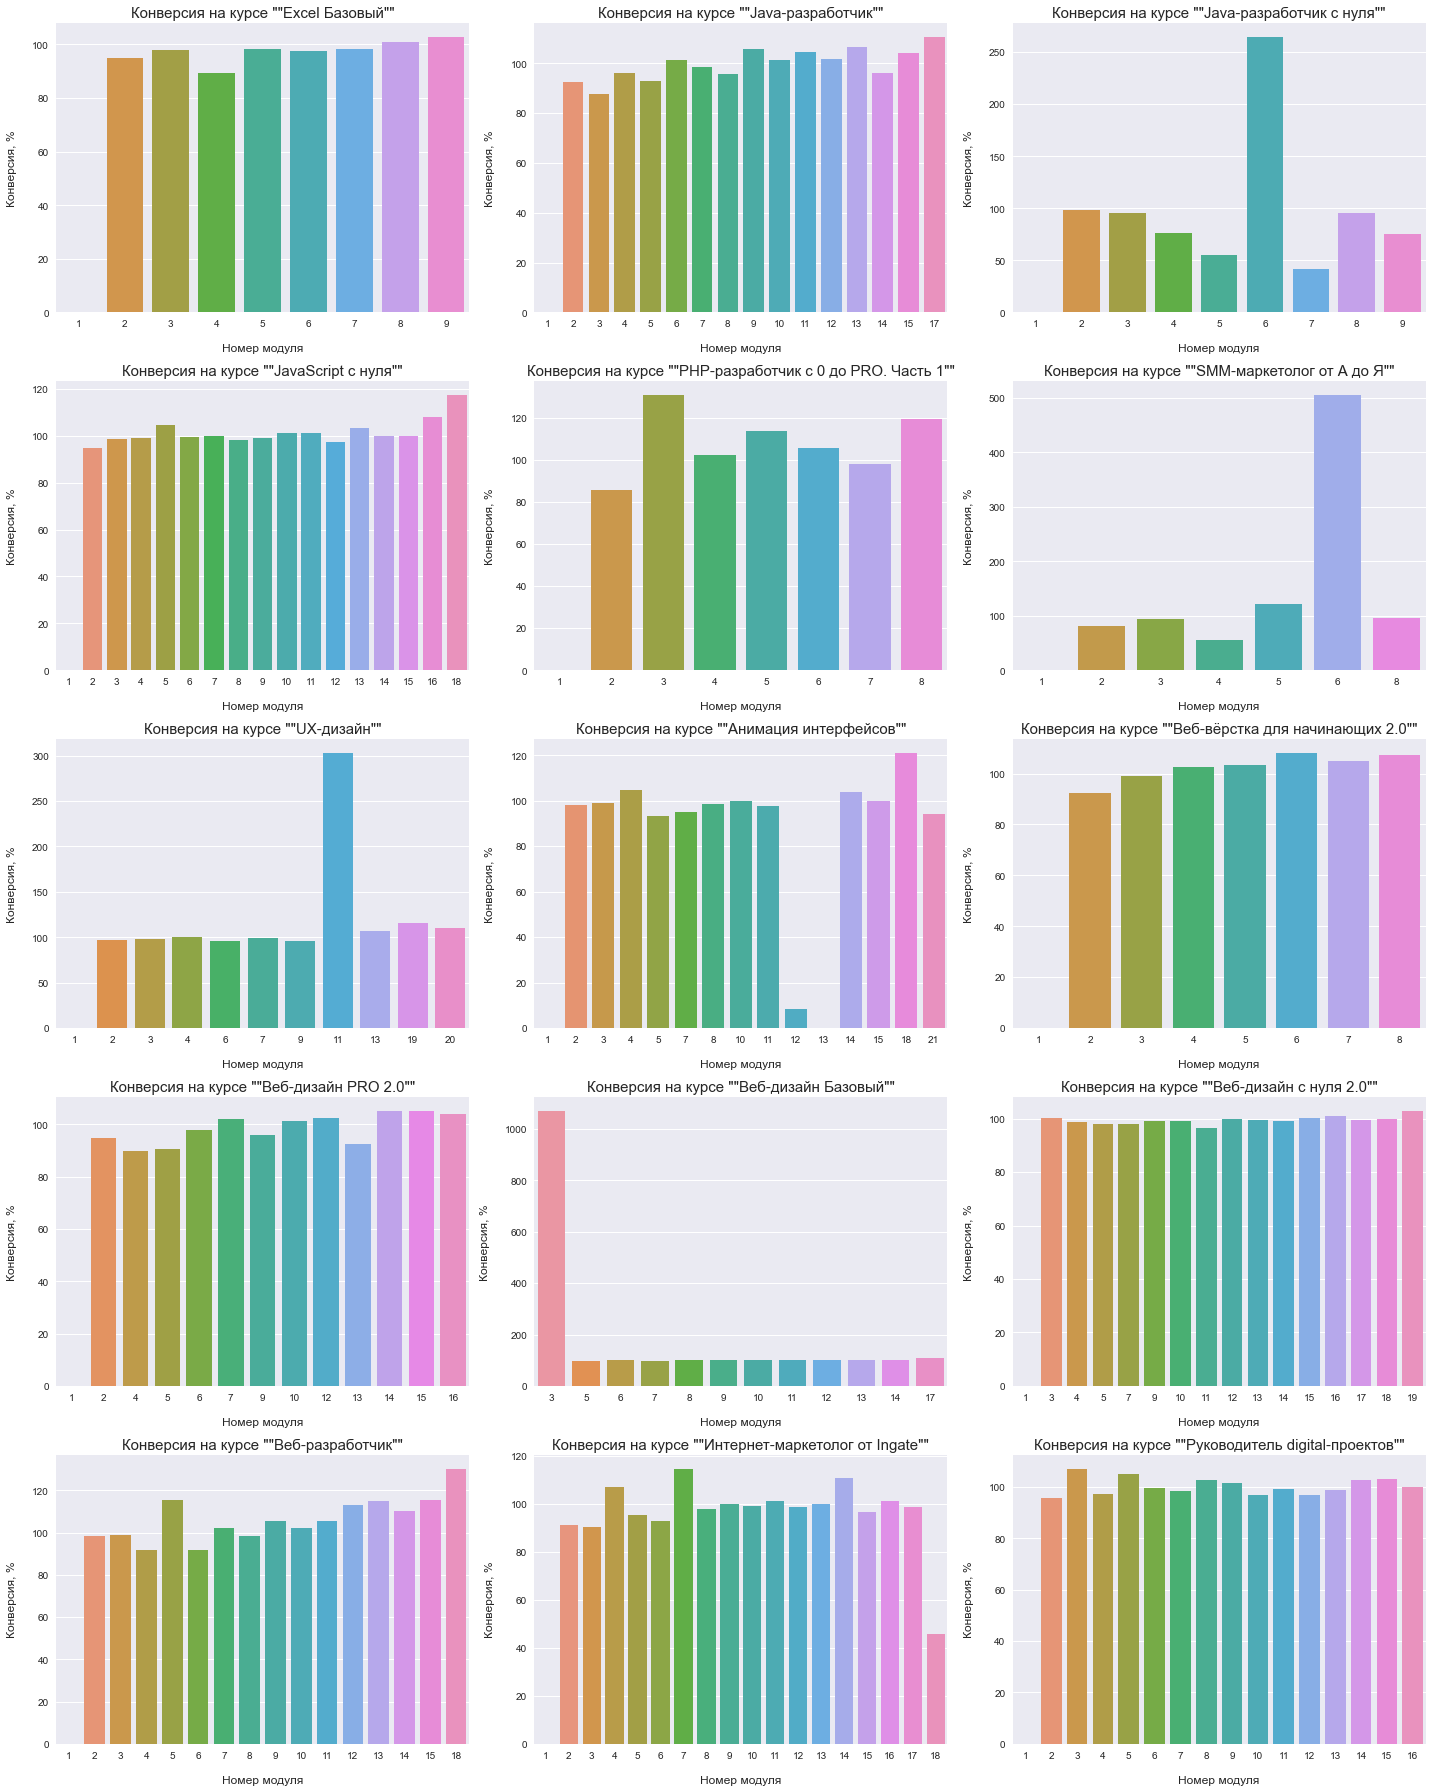

In [131]:
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20, 25))

courses = sorted(conversion_df['title'].unique())

for j in range(5):
    for k in range(3):
        course = courses[k + 3 * j]   
        ax = axs[j][k]
        d = conversion_df[conversion_df['title'] == course]
        sns.barplot(x=d['module_number'], y=d['conversion'], ax=ax)
        ax.set_title('Конверсия на курсе ""' + course + '""', fontsize=15)
        ax.set_xlabel('Номер модуля', fontsize=12, labelpad=15)
        ax.set_ylabel('Конверсия, %', fontsize=12, labelpad=15)

plt.tight_layout()    
plt.show()

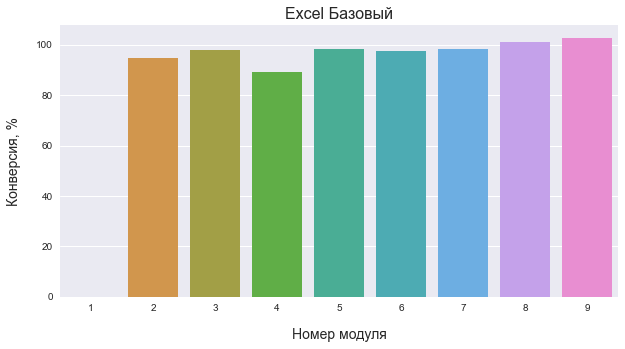

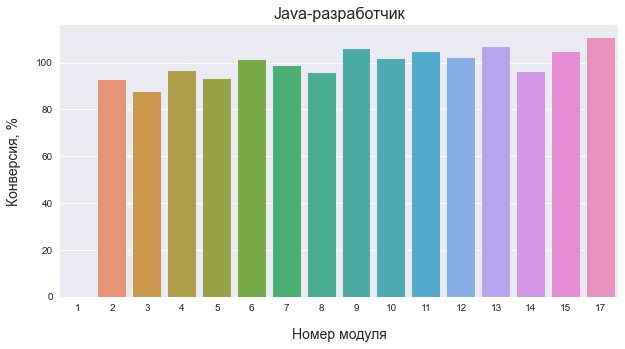

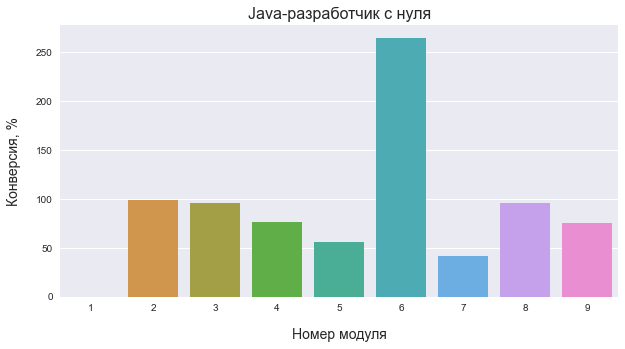

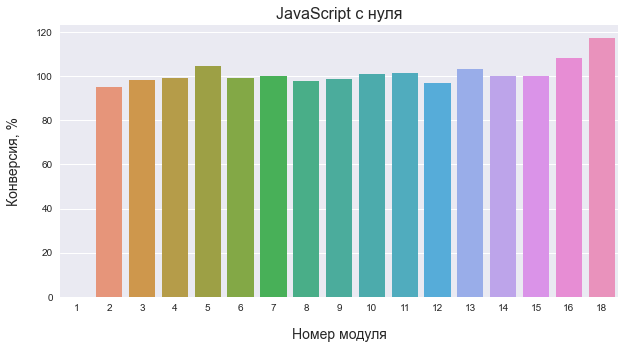

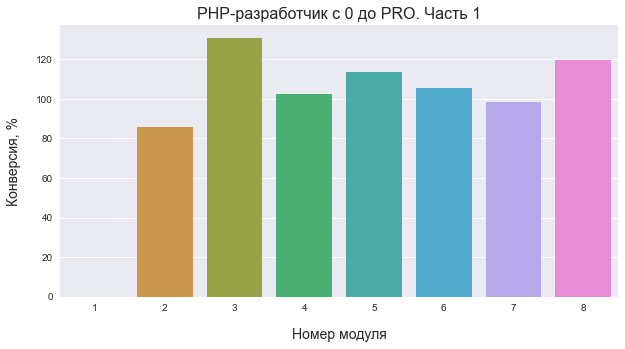

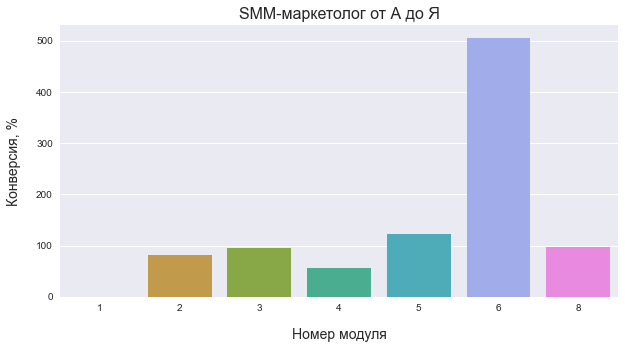

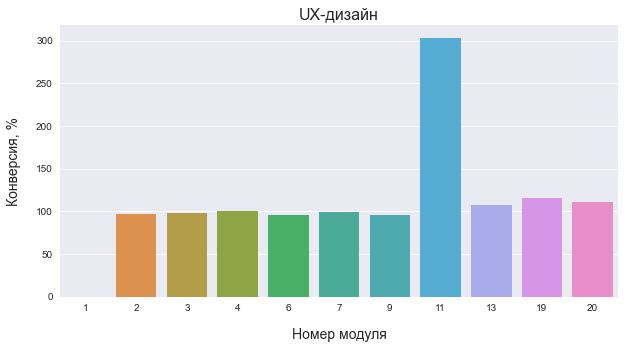

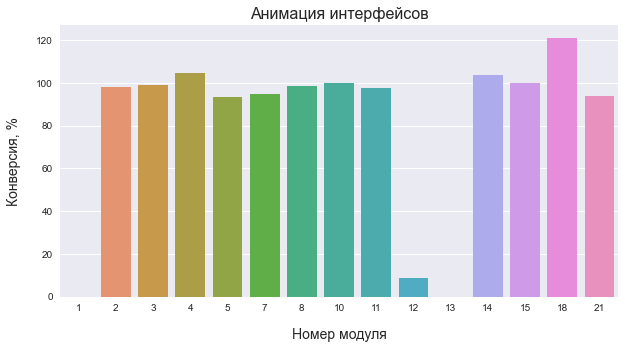

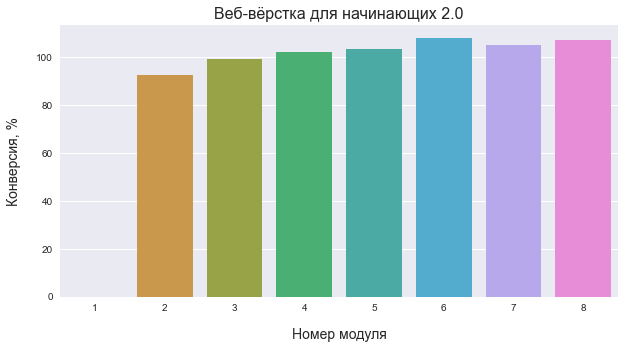

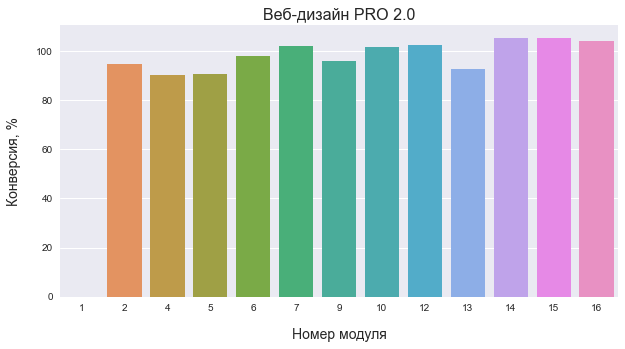

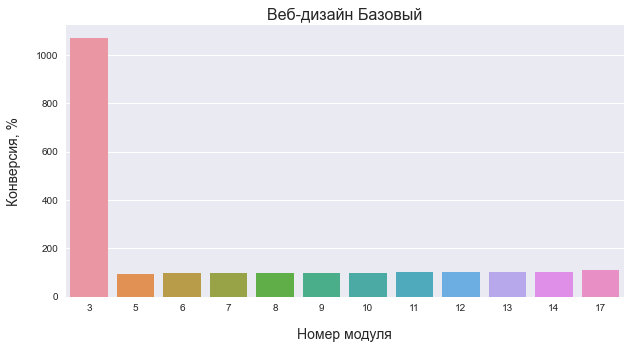

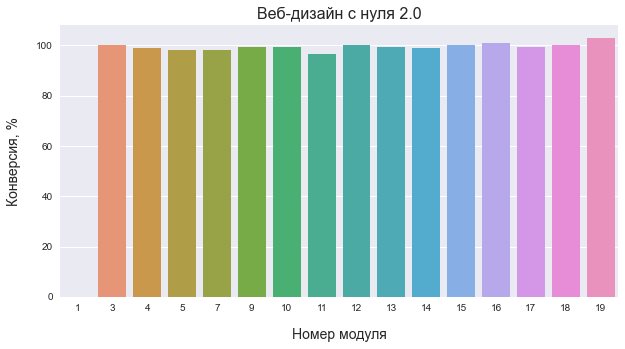

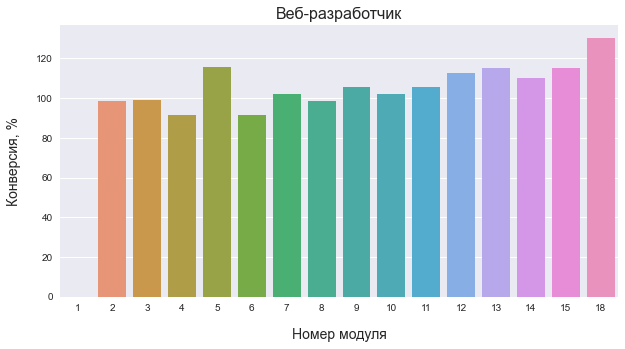

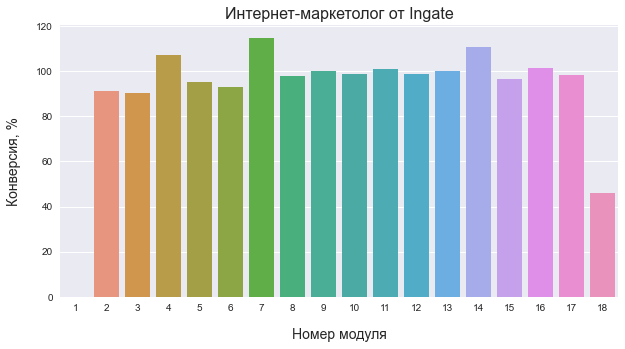

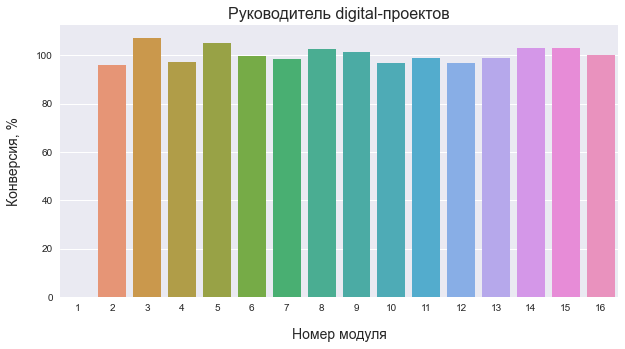

In [132]:
# 2-й вариант - в цикле (можно рассмотреть поподробней):

for name, data in conversion_df.groupby('title'):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(data['module_number'], data['conversion'])
    plt.title(name, fontsize=16)
    plt.xlabel('Номер модуля', fontsize=14, labelpad=15)
    plt.ylabel('Конверсия, %', fontsize=14, labelpad=15)
    
plt.show()

### 4.3 - Горизонтальный bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе:

* 15 графиков
* Графики должны иметь заголовки
* Ticks должны содержать номер и название модуля
* Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда)
* Прозрачность должна стоять на отметке 0.1
* На графики должна быть нанесена линия медианы конверсии для каждого курса
* У медианы должен быть свой цвет
* Рамок у графиков быть не должно

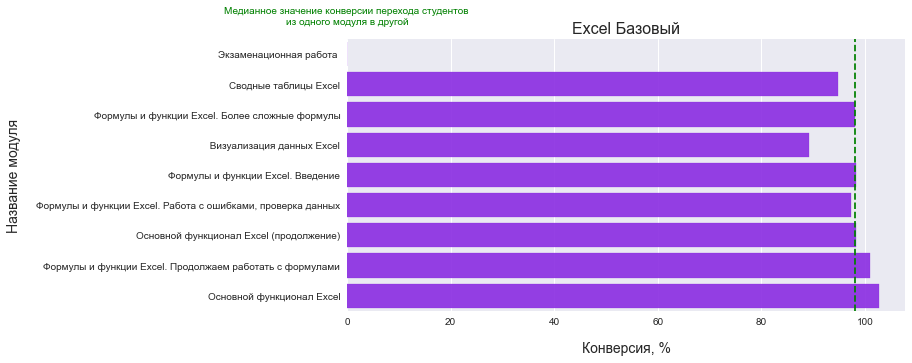

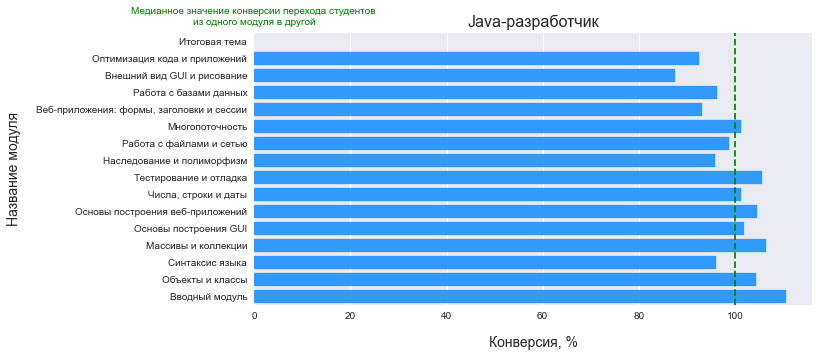

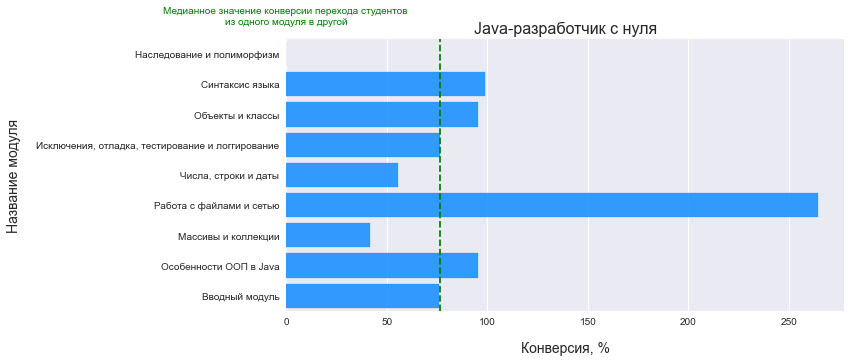

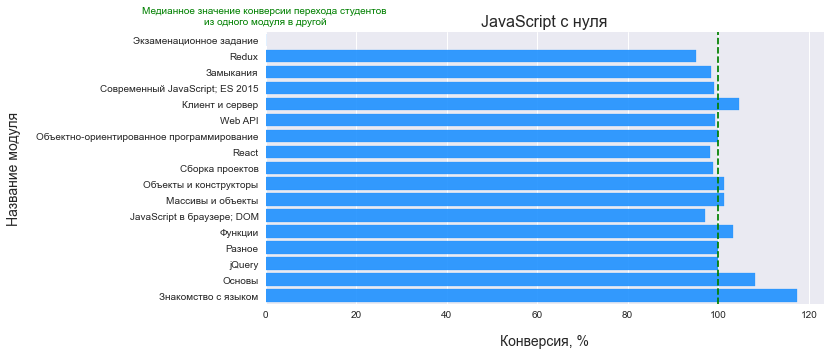

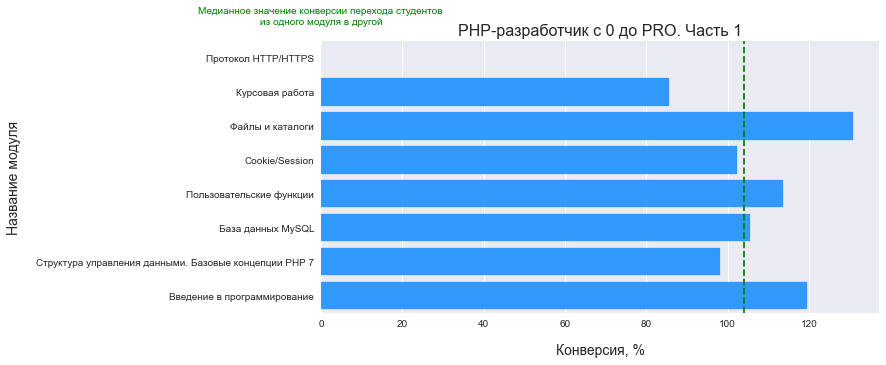

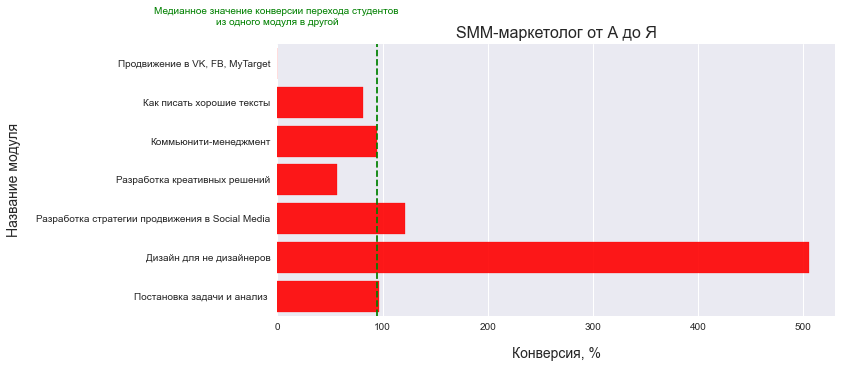

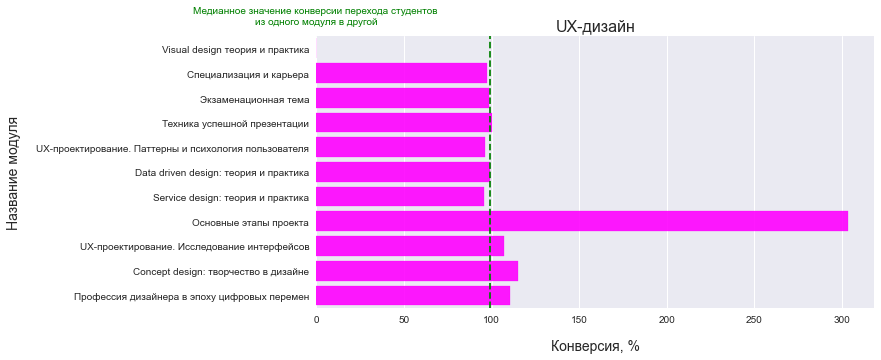

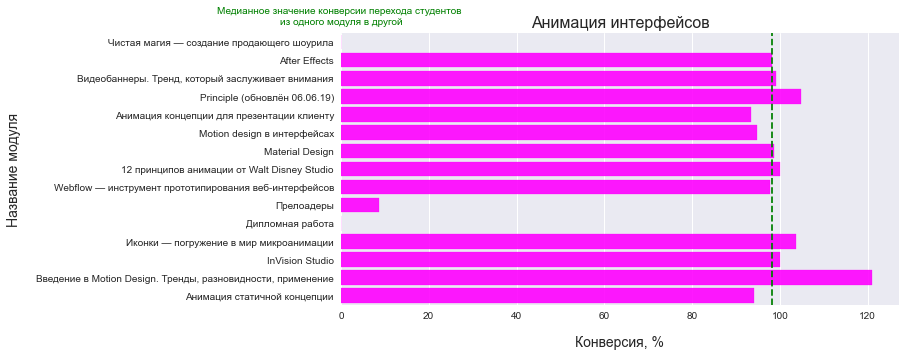

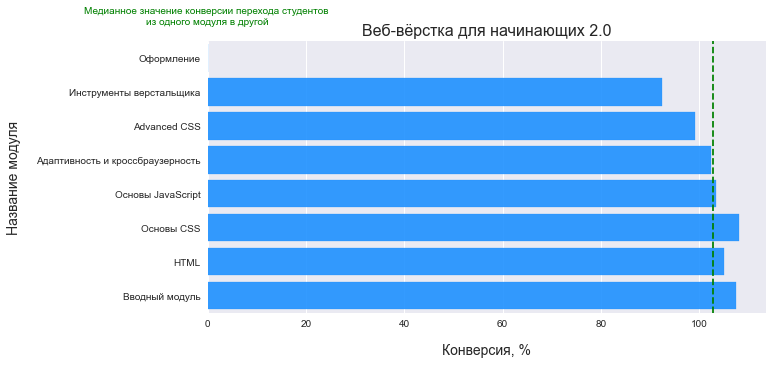

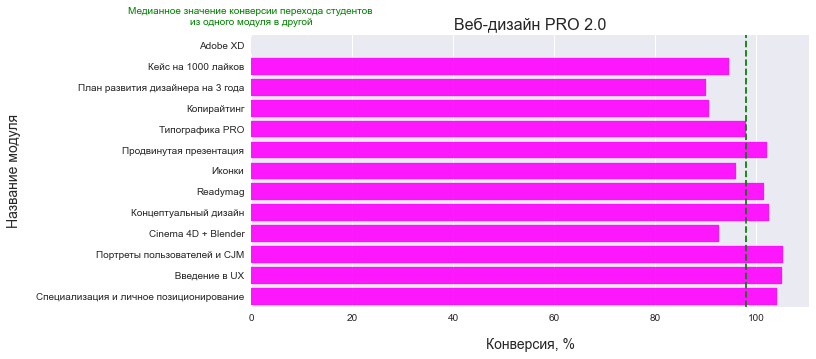

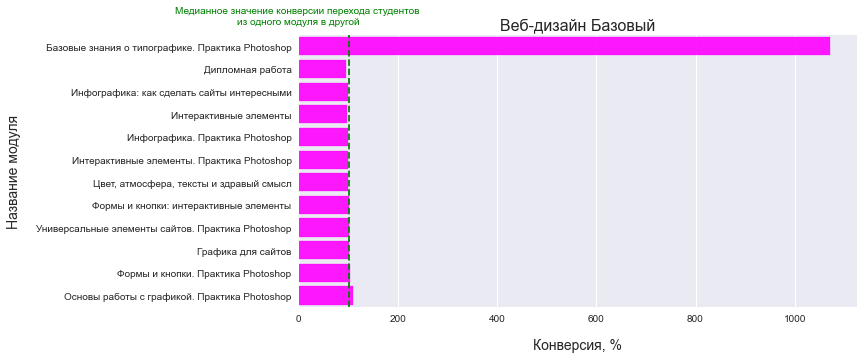

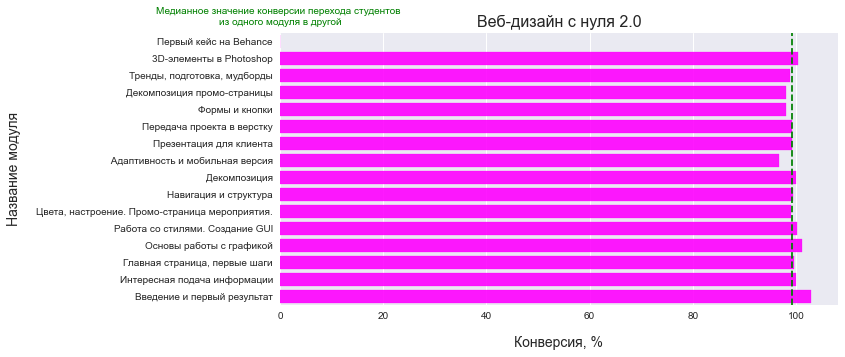

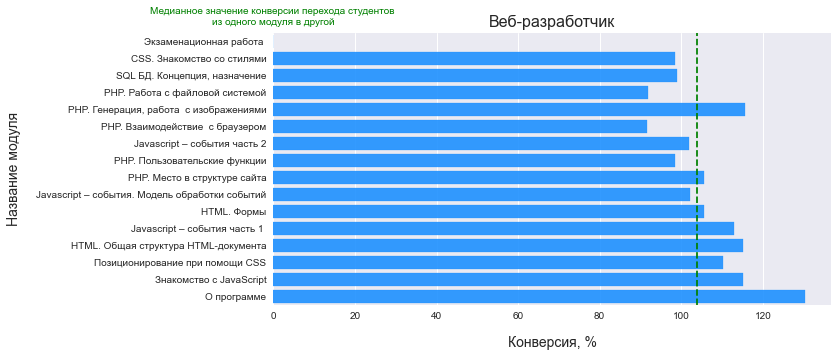

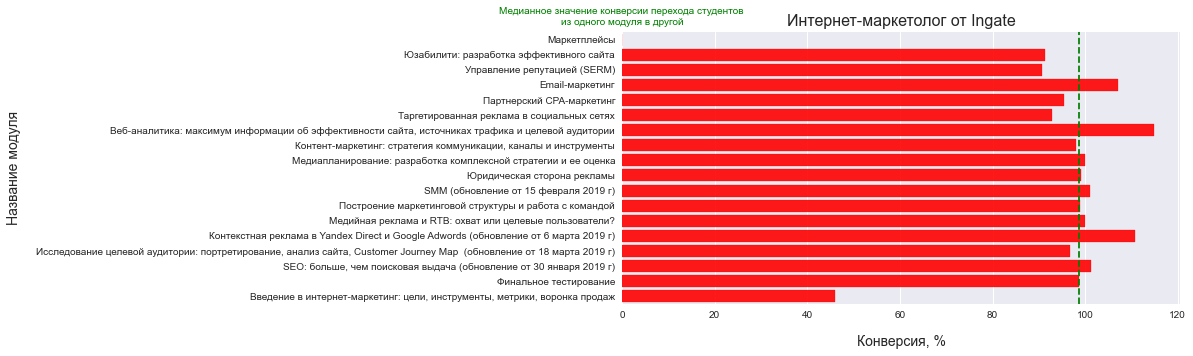

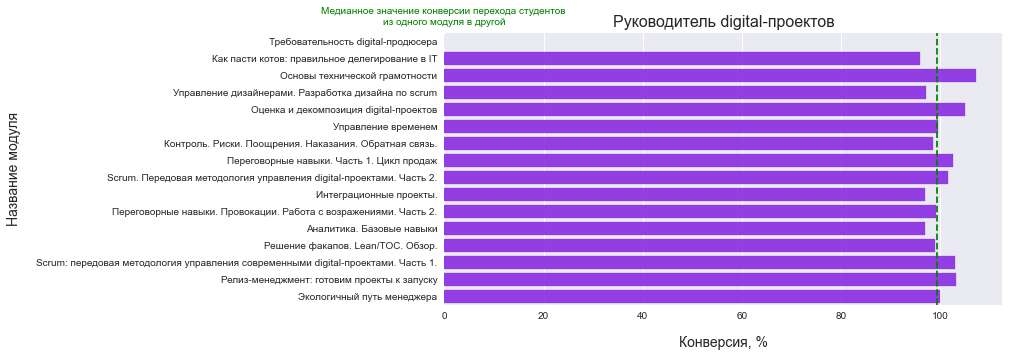

In [126]:
my_dict = {}
for i in range(fields.shape[0]):
    my_dict[fields.iloc[i, 1]] = fields.iloc[i, 0]
    
for name, data in conversion_df.groupby('title'):
    data.sort_values('conversion', ascending=False, inplace=True)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax = sns.barplot(y=data['module_number'], x=data['conversion'], orient = 'h', alpha=0.9, ci=None)
    
    for bar in ax.patches:
        if my_dict[name] == 'Marketing':
            bar.set_color('red')
        if my_dict[name] == 'Development':
            bar.set_color('dodgerblue')
        if my_dict[name] == 'Design':
            bar.set_color('magenta')
        if my_dict[name] == 'Business':
            bar.set_color('blueviolet')
   
        
    plt.title(name, fontsize=16)
    plt.ylabel('Название модуля', fontsize=14, labelpad=15)
    plt.xlabel('Конверсия, %', fontsize=14, labelpad=15)
    plt.yticks(list(range(len(data['module_number']))), data['module_title'])
    ax.axvline(np.median(data['conversion']), ls='--', color='g')  # медиана
    ax.text(0, -1, "Медианное значение конверсии перехода студентов \nиз одного модуля в другой", ha="center", color='g')

plt.show()

### 4.4 - Аналитический вывод на основании рассчитанных значений:

* Практически на каждом курсе медианное значение конверсии близко к 100% (кроме Java-разработчик с нуля, здесь около 75%). Это означает, что основная масса студентов в равном количестве переходит от модуля к модулю. 

* Аномально высокие конверсии в модулях "Java-разработчик с нуля", "SMM-маркетолог от А до Я", "UX-дизайн" и "Веб-дизайн Базовый" говорят о том, что студенты сдают домашние работы не последовательно, а переходят к выполнению домешней работы, не сдав предыдущую. Это может быть связано как с тем, что они имеют знания материала, даваемого в предыдущих модулях и сразу приступают к новой (или интересной) для них теме, так и с тем, что тема, наоборот, для них сложная, и пока они ждут ответа от проверяющего преподавателя, приступают к следующим модулям.
* Можно детальней разобрать модули с самой низкой конверсией и, выявив причины (например, посмотреть обратную связь от студентов) улучшить эти модули - сделать их более понятными (добавить материал или обновить), тем самым улучшив общую успеваемость и прохождение курсов.